In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly libraries
import plotly
import plotly.express as px
import plotly.graph_objs as go
#import chart_studio.plotly as py

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/complaints.csv"
df = pd.read_csv(path)

In [4]:
df4=df.copy()
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,15146,NaN,NaN,Web,2023-08-26,Closed with explanation,Yes,NaN,7560850
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30152,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7560851
2,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",FL,32137,NaN,Other,Web,2023-08-25,Closed with explanation,Yes,NaN,7560852
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,15146,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7560853
4,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NV,89135,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7560854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078862,2015-02-21,Credit card,NaN,Sale of account,NaN,NaN,NaN,JPMORGAN CHASE & CO.,AL,36695,NaN,NaN,Web,2015-02-21,Closed with explanation,Yes,Yes,1250605
4078863,2015-07-19,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",IL,60614,NaN,Consent not provided,Web,2015-07-19,Closed with explanation,Yes,No,1473577
4078864,2022-06-16,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,NaN,Mr. Cooper Group Inc.,IA,52205,NaN,NaN,Referral,2022-06-17,Closed with explanation,Yes,NaN,5683655
4078865,2022-04-26,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,V and H Portfolio,SC,29624,NaN,Consent not provided,Web,2022-04-26,Closed with non-monetary relief,Yes,NaN,5495755


In [5]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716465
Consumer complaint narrative    2600973
Company public response         2190771
Company                               0
State                             43208
ZIP code                          30212
Tags                            3652908
Consumer consent provided?       900882
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3310509
Complaint ID                          0
dtype: int64

In [6]:
# getting the sum of null values and ordering.
total = df.isnull().sum().sort_values(ascending = False)

#getting the percent and order of null.
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending =False)

# Concatenating the total and percent
missing = pd.concat([total , percent],axis =1,keys=['Total' ,'Percent'])

# Returning values of nulls different of 0
(missing[~(missing['Total'] == 0)])

,Total,Percent
Tags,3652908,89.556928
Consumer disputed?,3310509,81.162465
Consumer complaint narrative,2600973,63.767046
Company public response,2190771,53.710283
Consumer consent provided?,900882,22.086575
Sub-issue,716465,17.565294
Sub-product,235291,5.768538
State,43208,1.059314
ZIP code,30212,0.740696
Company response to consumer,5,0.000123


In [7]:
df[['Issue','Date received','Product','Sub-issue','Consumer complaint narrative','Company',
               'Company public response','Consumer consent provided?',
               'Company response to consumer','Submitted via']].describe().transpose()

,count,unique,top,freq
Issue,4078867,175,Incorrect information on your report,1063495
Date received,4078867,4307,2023-08-08,5147
Product,4078867,21,"Credit reporting, credit repair services, or o...",2167041
Sub-issue,3362402,267,Information belongs to someone else,698211
Consumer complaint narrative,1477894,1251034,My name is XXXX XXXX this complaint is not mad...,2120
Company,4078867,6945,"EQUIFAX, INC.",779362
Company public response,1888096,11,Company has responded to the consumer and the ...,1659782
Consumer consent provided?,3177985,4,Consent not provided,1541226
Company response to consumer,4078862,8,Closed with explanation,2958525
Submitted via,4078867,7,Web,3552783


In [8]:
sns.set(style='white')
df['Issue'].str.strip("'").value_counts()[0:15].iplot(kind='bar',title='Top 15 issues',fontsize=14,color='violet')

In [9]:
df['Sub-issue'].str.strip("'").value_counts()[0:15].iplot(kind ='bar',
                                                                     title='Top 15 Sub Issues',fontsize=14,color='magenta')

### No. of disputes
Roughly 21% of the consumer have disputed.

Text(0, 0.5, 'Count')

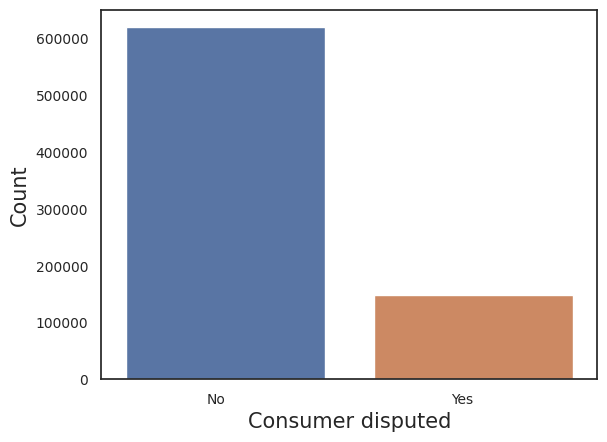

In [10]:
sns.countplot(x = 'Consumer disputed?', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Product wise disputes
##### Roughly 37% consumer with mortgage have disputed.
##### Approx. 54% consumer who have disputed are from mortgage or debt collection.
##### 68% consumer having disputes are from mortgage, debt collection and credit reporting.
##### Adding credit card consumers and bank account or services consumer will make it 80% and 91% respectively.

Text(0, 0.5, 'Count')

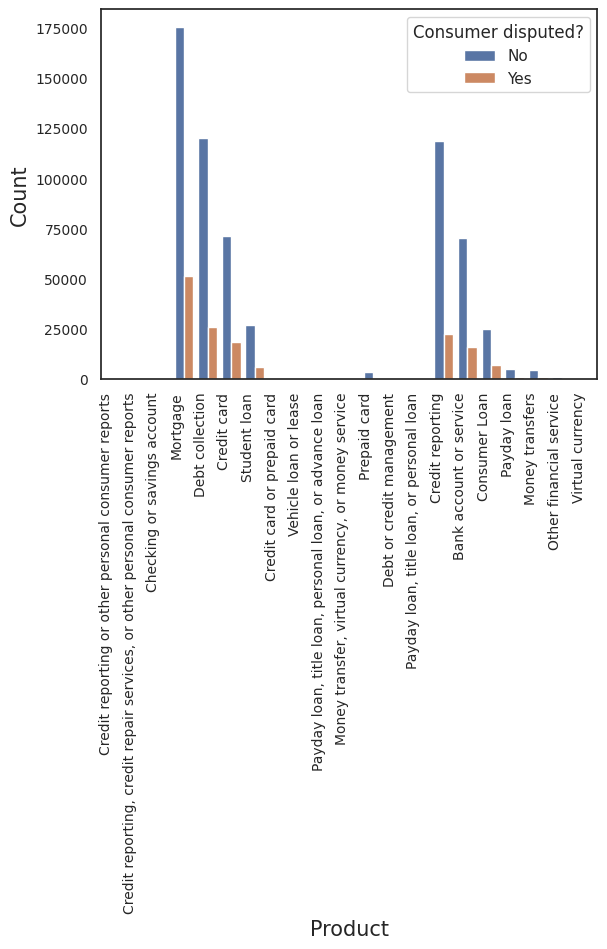

In [11]:
sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = df)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Issues with highest disputes
##### 66% disputes are from these 10 issues.

Text(0, 0.5, 'Count')

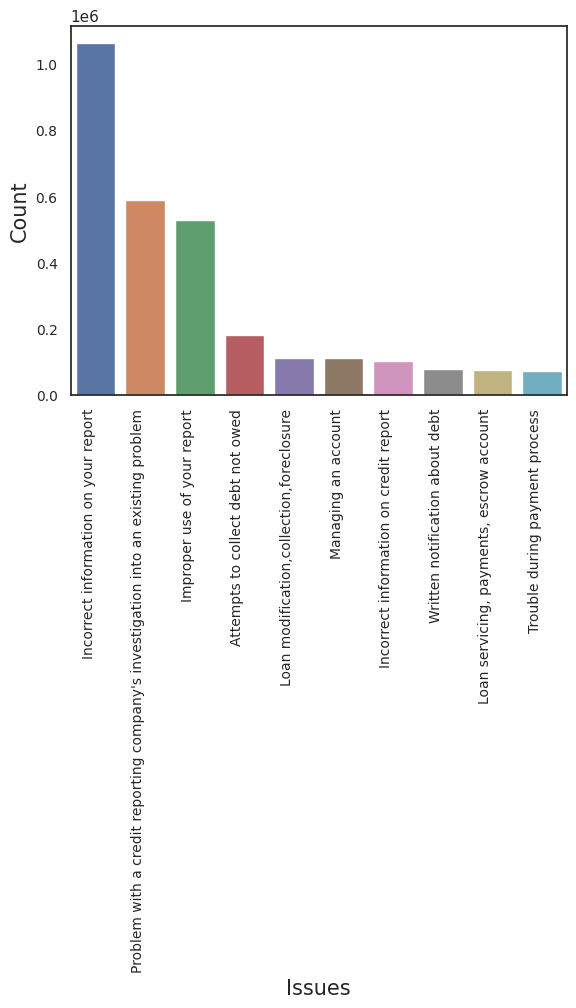

In [12]:
top_issues_disputes = df['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Issues', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### State with maximum disputes
##### 15% disputes from CA.
##### 25% disputes from CA and FL
##### 32% disputes from CA, FL and TX.
##### 38% disputes from CA, FL, TX and NY.
##### 43% disputes from CA, FL, TX, NY and GA.
##### 47% disputes from CA, FL, TX, NY, GA and NJ.
##### 50% disputes from CA, FL, TX, NY, GA, NJ and IL.
##### 54% disputes from CA, FL, TX, NY, GA, NJ, IL and VA.
##### 57% disputes from CA, FL, TX, NY, GA, NJ, IL, VA and PA.
##### 61% disputes from CA, FL, TX, NY, GA, NJ, IL, VA, PA and MD.

Text(0, 0.5, 'Count')

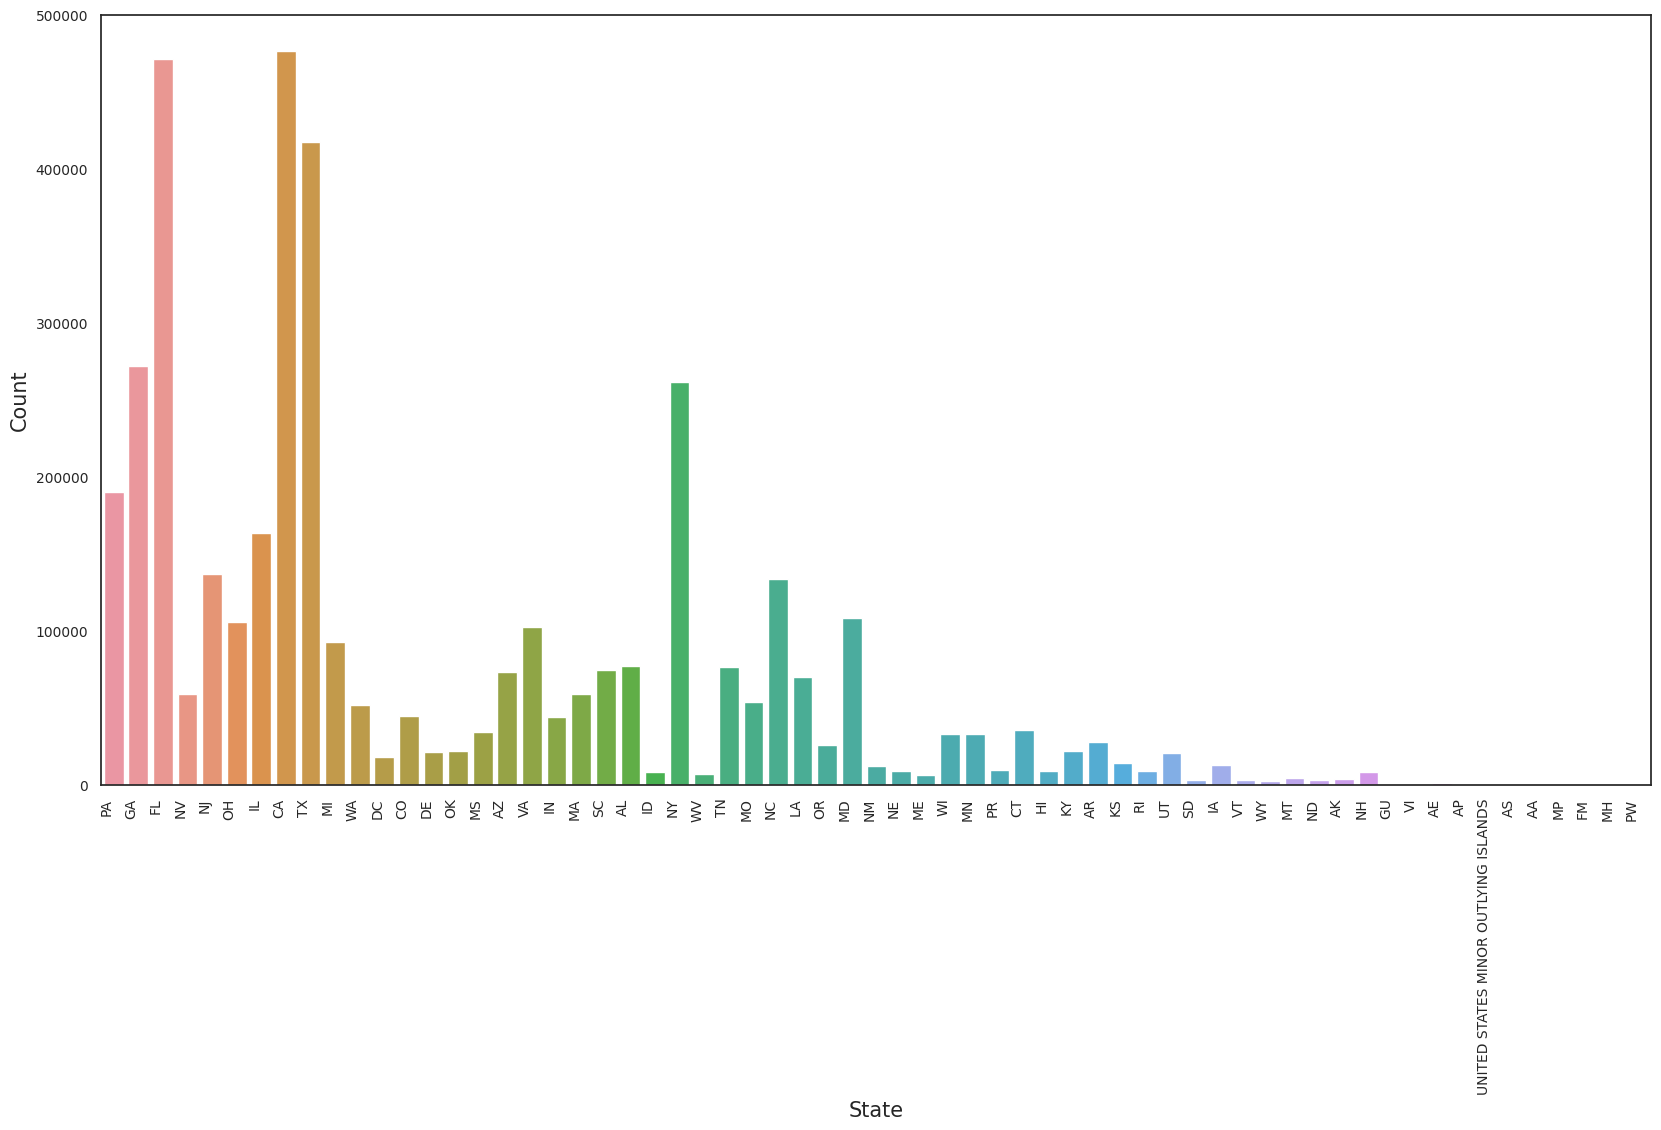

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df['State'])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Disputes submitted via
##### 72% disputes are submitted via web.
##### 88% disputes are submitted via web and referral.

Text(0, 0.5, 'Count')

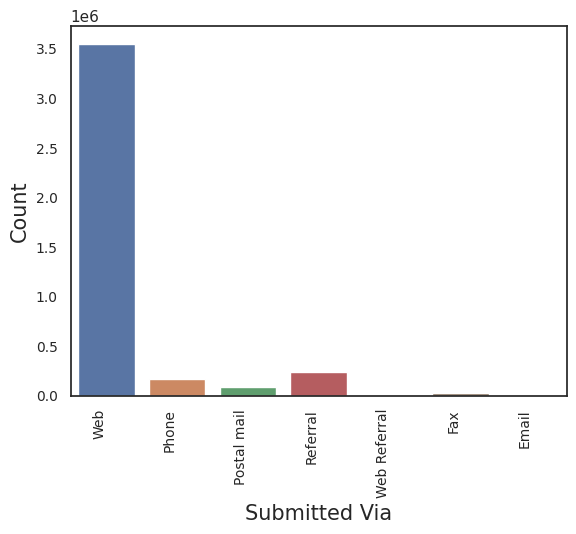

In [14]:
sns.countplot(x = 'Submitted via', data = df)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Submitted Via', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Company's response to customers
##### 74% complaints are closed with explanation.

Text(0, 0.5, 'Count')

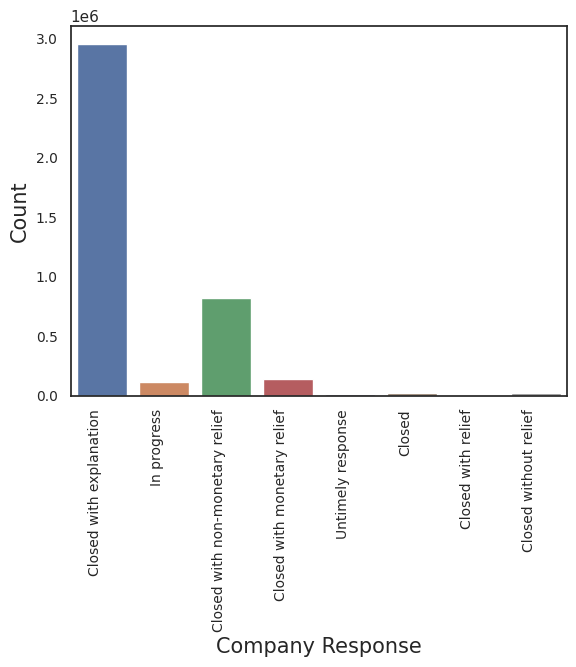

In [15]:
sns.countplot(x = 'Company response to consumer', data = df)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Timely response
##### 98% disputes were timely repsonded at the intial stages.

Text(0, 0.5, 'Count')

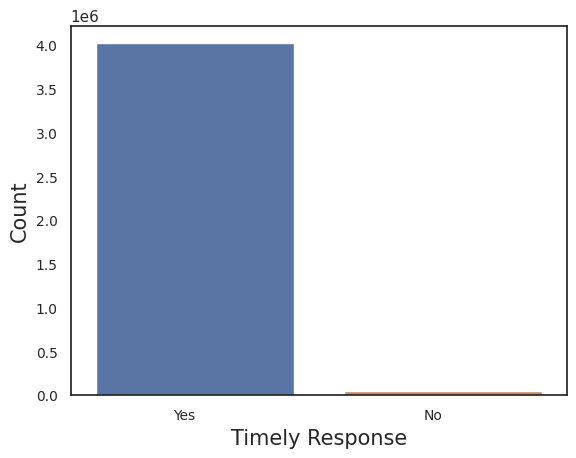

In [16]:
sns.countplot(x = 'Timely response?', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Timely Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Extracting Date, Month and Year from Date Received Column

In [17]:
from datetime import datetime, date

In [18]:
df2=df.copy()
df2['Year_Received'] = df2['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df2['Month_Received'] = df2['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df2['Day_Received'] = df2['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

### Extracting Date, Month and Year From Date Sent to the Company Column

In [19]:
df2['Year_Sent'] = df2['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df2['Month_Sent'] = df2['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df2['Day_Sent'] = df2['Date sent to company'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

### Converting Dates from Object Type to Datetime Type

In [20]:
df2['Date received'] = pd.to_datetime(df2['Date received'])
df2['Date sent to company'] = pd.to_datetime(df2['Date sent to company'])

### Calculating the Number of Days the Complaint was with the Company

In [21]:
df2['Days held'] = df2['Date sent to company'] - df2['Date received']

### Converting Days Held to Int

In [22]:
df2['Days held'] = df2['Days held'].astype('timedelta64[ns]').astype(int)

### Dropping Date Received and Date Sent to Company¶

In [23]:
df2 = df2.drop(['Date received', 'Date sent to company'], axis = 1)

### Dropping ZIP Code, Complaint ID

In [24]:
df2 = df2.drop(['ZIP code', 'Complaint ID'], axis = 1)

### Imputing Nulls in State by Mode

In [25]:
df2['State'].mode()

0    CA
Name: State, dtype: object

In [26]:
df2['State'] = df2['State'].replace(np.nan, 'CA')

### Dropping Year Sent, Month Sent and Day Sent

In [27]:
df2 = df2.drop(['Year_Sent', 'Month_Sent', 'Day_Sent'], axis = 1)

### Categorizing Days into Weeks

In [28]:
week_train = []
for i in df2['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df2['Week_Received'] = week_train

### Dropping Day_Received

In [29]:
df2 = df2.drop(['Day_Received'], axis = 1)

### Year-wise complaints
##### 28% complaints are raised in 2015.
##### 53% complaints are raised in 2014 and 2015.
##### 71% complaints are raised in 2013 to 2015.
##### 88% complaints are raised in 2013 to 2016.

Text(0, 0.5, 'Count')

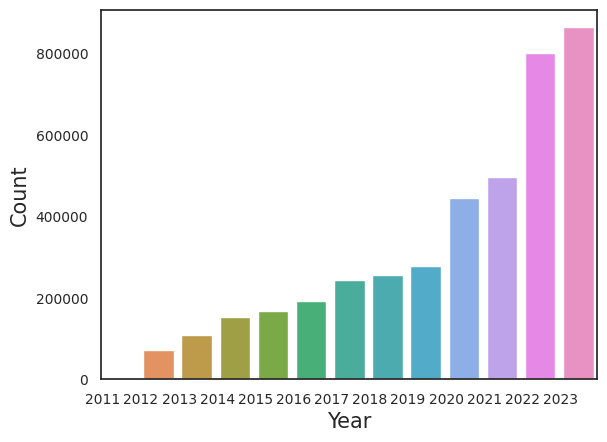

In [30]:
sns.countplot(x = 'Year_Received', data = df2)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Year-wise disputes
#####  27% disputes are raised in 2015.
#####  50% disputes are raised in 2014 and 2015.
#####  69% disputes are raised in 2014 to 2016.
#####  87% disputes are raised in 2013 to 2016.

In [31]:
disputed_cons = df2[df2['Consumer disputed?'] == 'Yes']

Text(0, 0.5, 'Count')

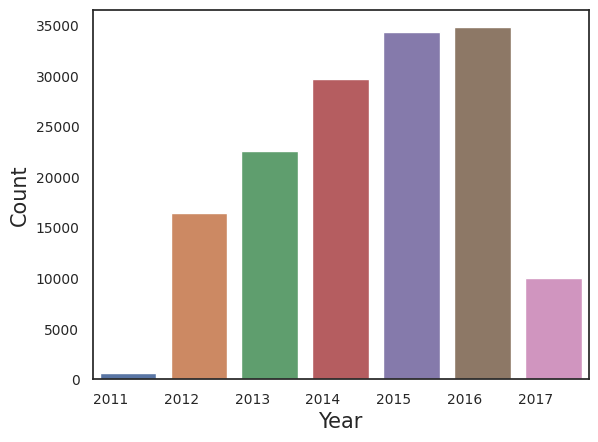

In [32]:
sns.countplot(x = 'Year_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Month-wise complaints
##### 64% complaints are raised in January to July.
##### 72% complaints are raised in January to August.

Text(0, 0.5, 'Count')

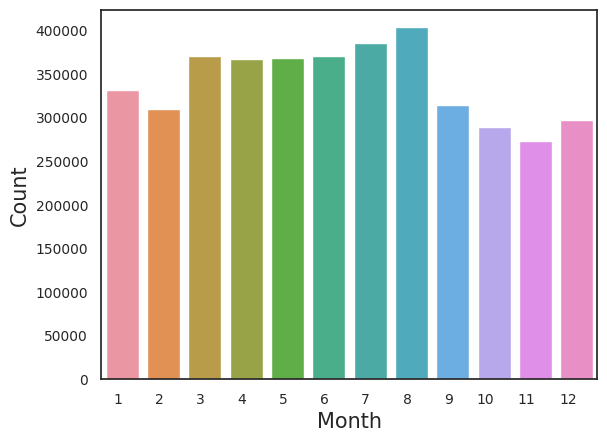

In [33]:
sns.countplot(x = 'Month_Received', data = df2)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Month-wise disputes
##### 56% disputes are raised in March to August.
##### 73% disputes are raised in January to August.

Text(0, 0.5, 'Count')

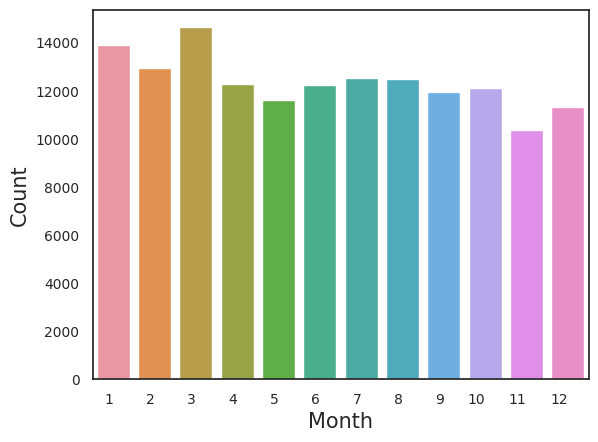

In [34]:
sns.countplot(x = 'Month_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Week-wise complaints
##### 30% complaints are in the 4th week of the month.
##### 50% complaints are in both the half of the month.

Text(0, 0.5, 'Count')

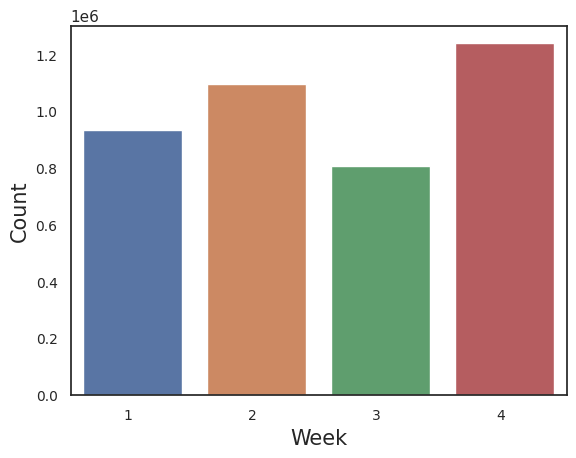

In [35]:
sns.countplot(x = 'Week_Received', data = df2)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Week-wise disputes
##### 30% disputes are in the 4th week of the month.
##### 50% disputes are in both the half of the month.

Text(0, 0.5, 'Count')

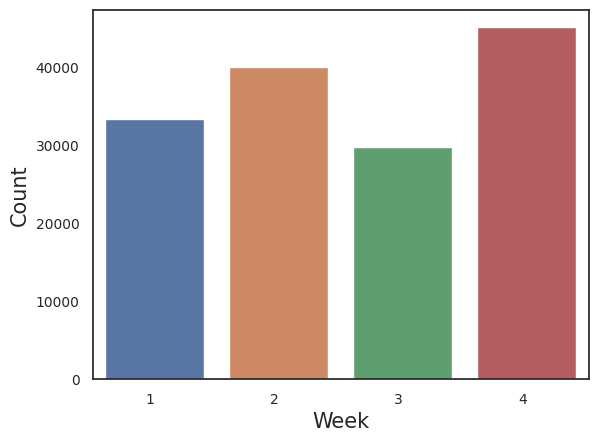

In [36]:
sns.countplot(x = 'Week_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Companies with Highest Complaints
##### 53% complaints are for these 10 companies

Text(0, 0.5, 'Count')

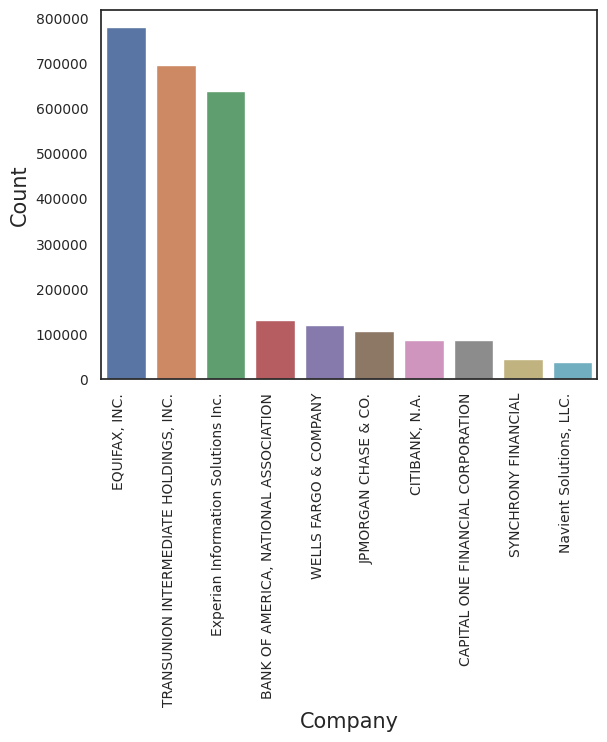

In [37]:
worst_company_complaints = df['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Companies with highest disputes
##### 53% disputes are for these 10 companies

Text(0, 0.5, 'Count')

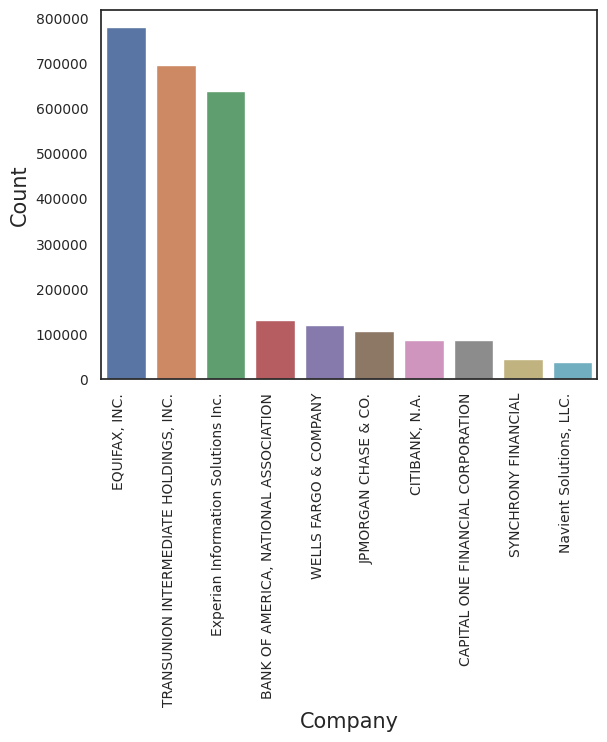

In [38]:
worst_company_disputes = df['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

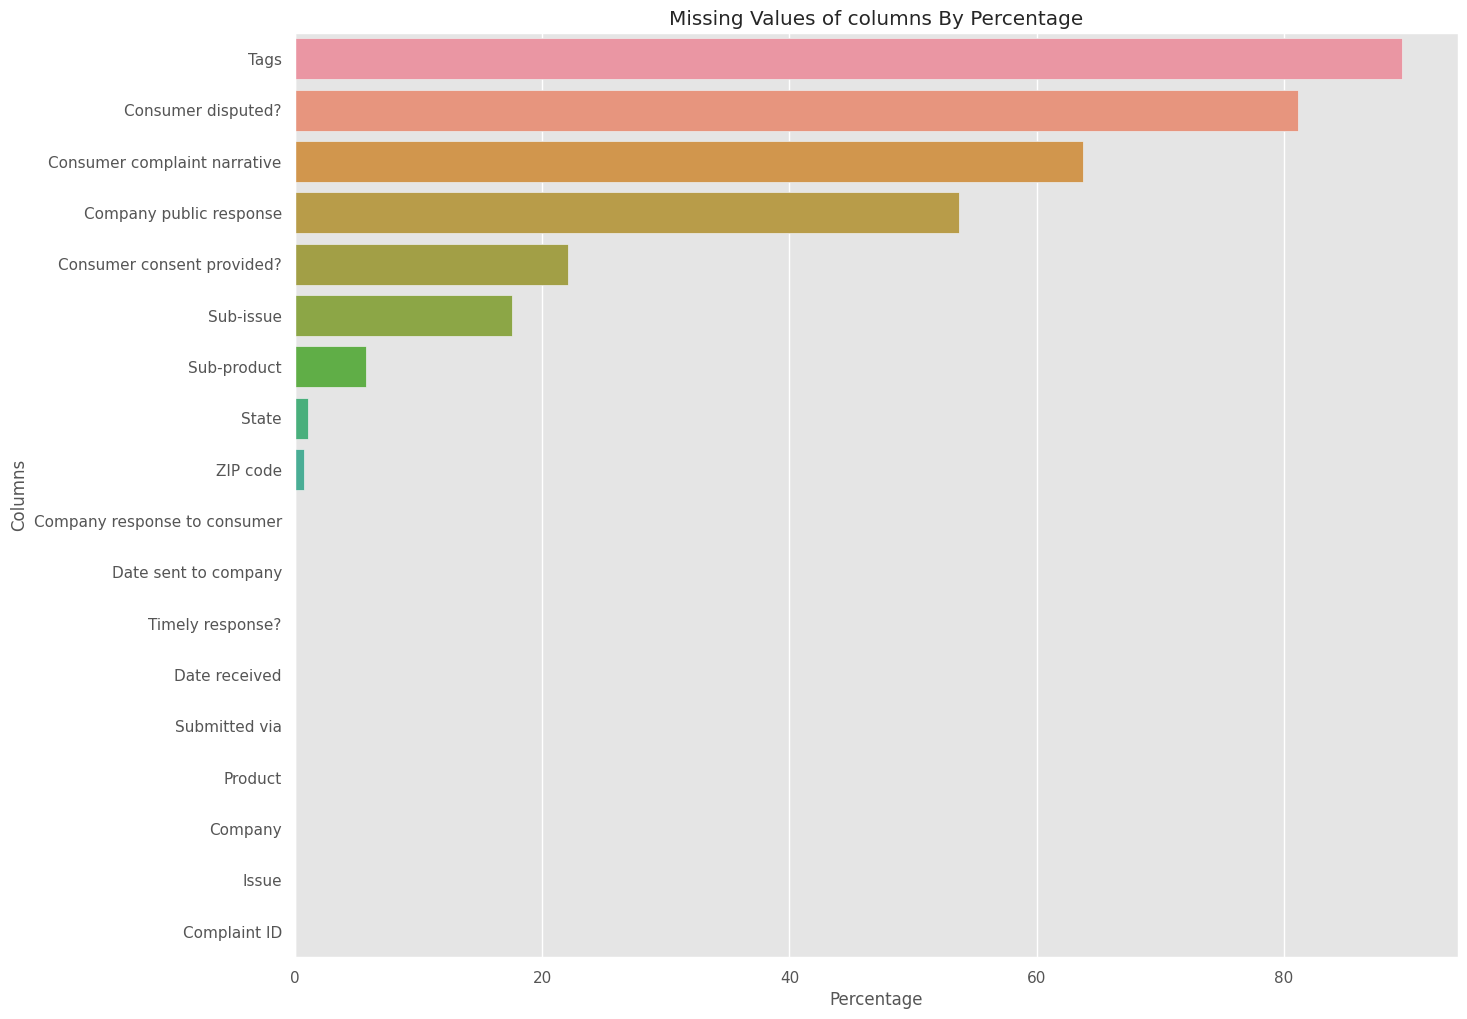

In [39]:
# Percentage of missing values
plt.figure(figsize = (15,12))
plt.style.use('ggplot')
bar_plot = df.isnull().sum().sort_values(ascending=False)*100/len(df)
plt.title("Missing Values of columns By Percentage")
plt.xlabel("Percentage")
plt.ylabel("Columns")
sns.barplot(y = bar_plot.keys(), x = bar_plot.values, orient="h")
plt.show()

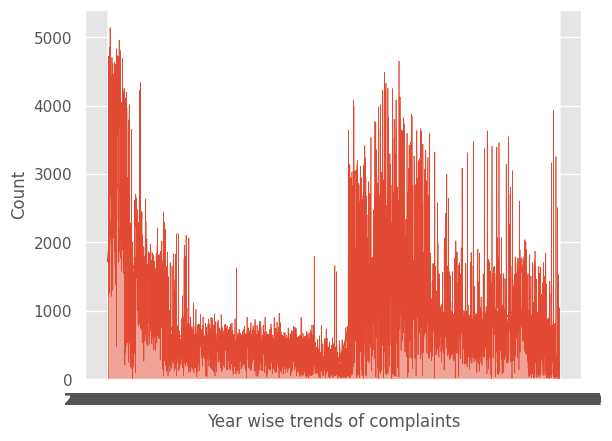

In [40]:
plt.style.use('ggplot')
sns.histplot(df['Date received'], kde=True, bins=65,element= 'poly')
plt.xlabel("Year wise trends of complaints")
plt.show()

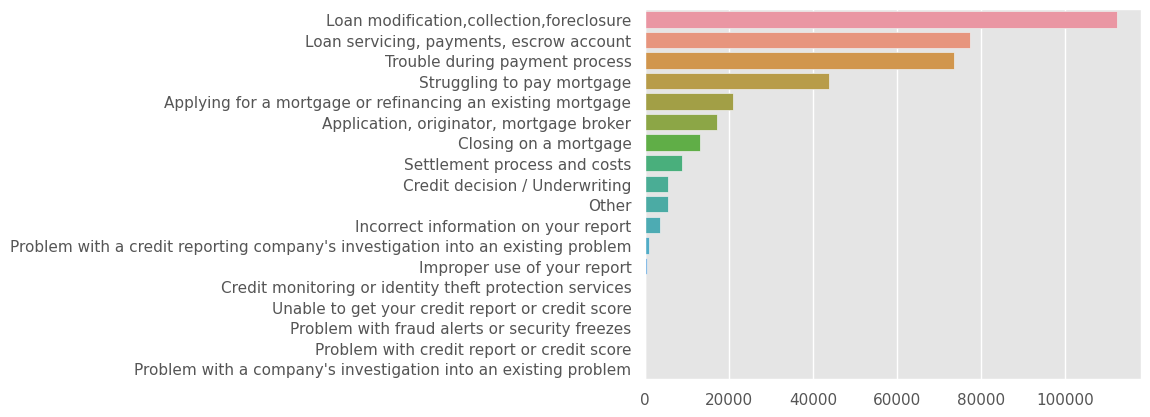

In [41]:
mortgage_df = df[df['Product'] == 'Mortgage']
mortgage_issue = mortgage_df['Issue'].value_counts()
plt.style.use('ggplot')
sns.barplot(x=mortgage_issue.values, y=mortgage_issue.keys(),orient='h')
plt.show()

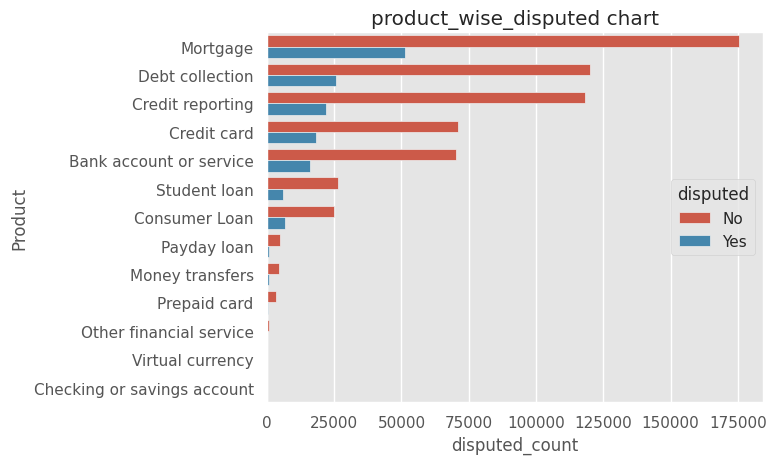

In [42]:
disputed_count = df[['Product','Consumer disputed?']].value_counts().values
df_series = df[['Product','Consumer disputed?']].value_counts().keys()
Product = []
disputed = []
for i in range(len(df_series)):
    l = df_series[i]
    Product.append(l[0])
    disputed.append(l[1])
disputed_plot_df = pd.DataFrame(data={'Product':Product,'disputed':disputed,
                                      'disputed_count':disputed_count})
plt.title("product_wise_disputed chart")
sns.barplot(data=disputed_plot_df, y = 'Product', x = 'disputed_count', hue =
            'disputed', orient='h')
plt.show()

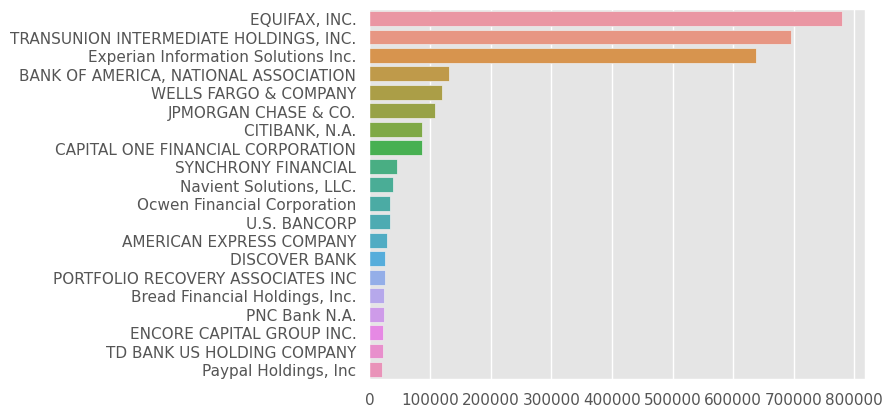

In [43]:
plt.style.use('ggplot')
Top_20_company = df['Company'].value_counts()[:20]
sns.barplot(x=Top_20_company.values, y=Top_20_company.keys(), orient='h')
plt.show()

In [44]:
# making a list of top 20 company
top_20_company_names = df['Company'].value_counts().keys()[:20]

# grouping company by groupby operations
group_df_name = []
for i in range(len(top_20_company_names)):
    group_df_name.append('top_'+ str(i+1))
company_group_by = df.groupby(by=df['Company'])

# making separet data frame for each company
for i in range(len(top_20_company_names)):
    group_df_name[i] = company_group_by.get_group(top_20_company_names[i])

# only taken 'Company','Timely response?' column for our analysis
for i in range(len(group_df_name)):
    group_df_name[i] = group_df_name[i][['Company','Timely response?']]

#making data frame for plotting
company = []
yes = []
no = []
for i in range(len(group_df_name)):
    company.append(group_df_name[i].value_counts().keys()[1][0])
    yes.append(group_df_name[i].value_counts().values[0])
    no.append(group_df_name[i].value_counts().values[1])
com = np.array([company]).reshape(20,1)
y = np.array([yes]).reshape(20,1)
n = np.array([no]).reshape(20,1)
plot_data = pd.DataFrame(data=com, columns=["Company"])
plot_data["yes"] = y
plot_data["no"] = n
plot_data['percentage_of timely_responce'] = plot_data["yes"]*100/(plot_data["yes"] + plot_data["no"])
plot_data

,Company,yes,no,percentage_of timely_responce
0,"EQUIFAX, INC.",777586,1776,99.772121
1,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",694790,324,99.953389
2,Experian Information Solutions Inc.,638055,44,99.993105
3,"BANK OF AMERICA, NATIONAL ASSOCIATION",127541,4001,96.958386
4,WELLS FARGO & COMPANY,115861,3809,96.817080
5,JPMORGAN CHASE & CO.,107436,96,99.910724
6,"CITIBANK, N.A.",86826,369,99.576811
7,CAPITAL ONE FINANCIAL CORPORATION,86729,84,99.903240
8,SYNCHRONY FINANCIAL,45696,17,99.962811
9,"Navient Solutions, LLC.",38622,3,99.992233


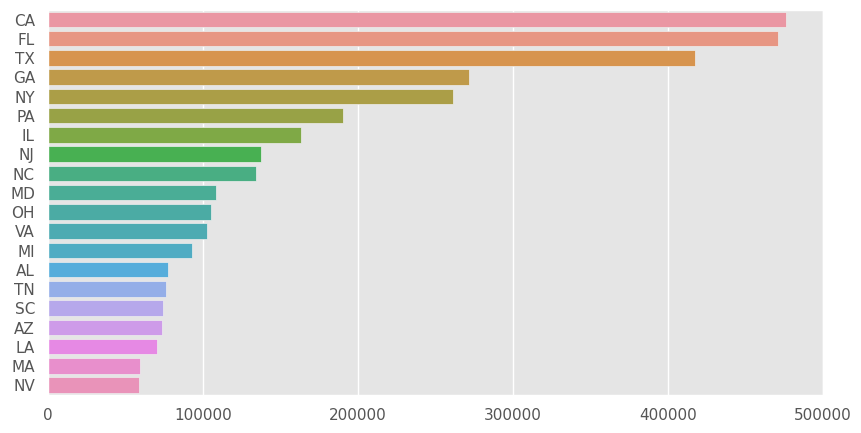

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.barplot(x=df['State'].value_counts().values[:20], y=df['State'].value_counts().keys()[:20])
plt.show()

In [46]:
print("More than",df['State'].value_counts().values[:20].sum()*100/len(df))

print("of the complain coming from these states ", df['State'].value_counts().keys()[:20])

More than 83.86510273563712
of the complain coming from these states  Index(['CA', 'FL', 'TX', 'GA', 'NY', 'PA', 'IL', 'NJ', 'NC', 'MD', 'OH', 'VA',
       'MI', 'AL', 'TN', 'SC', 'AZ', 'LA', 'MA', 'NV'],
      dtype='object')


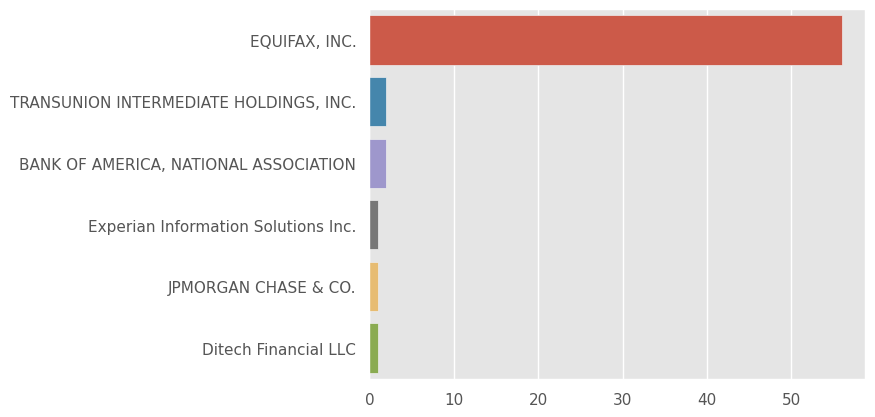

In [47]:
states_list = df['State'].value_counts().keys()
company_state_wise = []
for i in range(len(states_list)):
    company_state_wise.append(df.groupby(by=df['State']).get_group(states_list[i]
                                                                              )['Company'].value_counts().keys()[0])

top_company_state_df = pd.DataFrame({'States':states_list})
top_company_state_df['Company'] = np.array(company_state_wise)
plt.style.use('ggplot')
sns.barplot(x=top_company_state_df['Company'].value_counts().values
           , y=top_company_state_df['Company'].value_counts().keys(), orient='h')
plt.show()

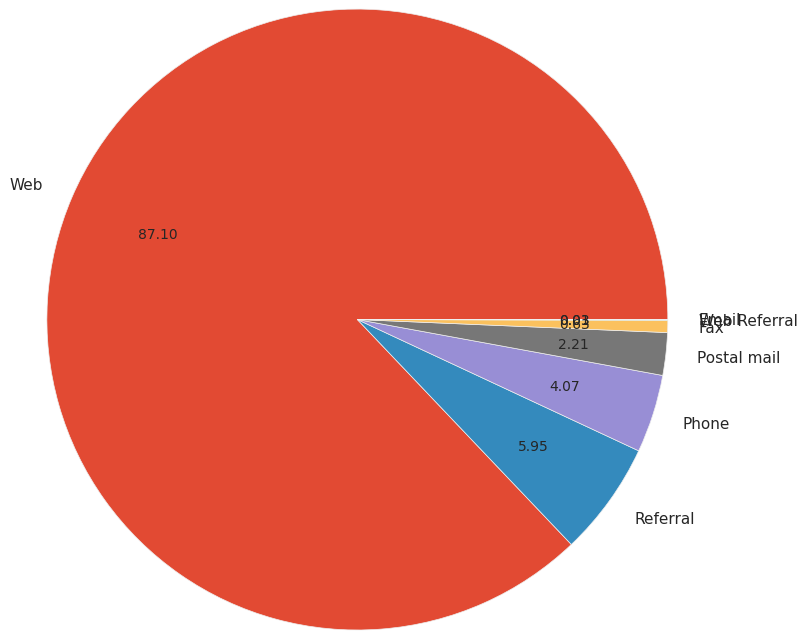

In [48]:
plt.pie(df['Submitted via'].value_counts().values, labels=
        df['Submitted via'].value_counts().keys() , autopct='%.2f',pctdistance=0.7, radius=2.1)
plt.show()

[]

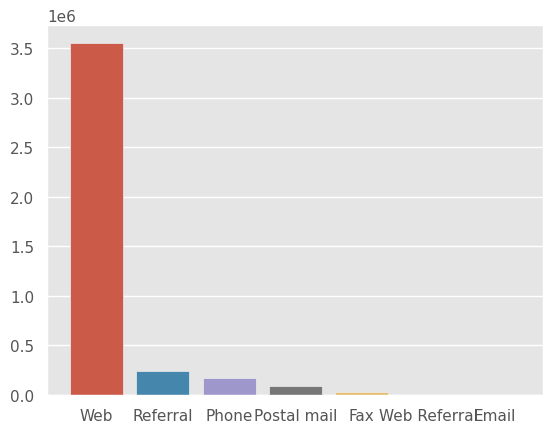

In [49]:
x = df['Submitted via'].value_counts().keys()
y = df['Submitted via'].value_counts().values
sns.barplot(x=df['Submitted via'].value_counts().keys(),y=df['Submitted via'].value_counts().values)
plt.plot()

(90.0, 101.0)

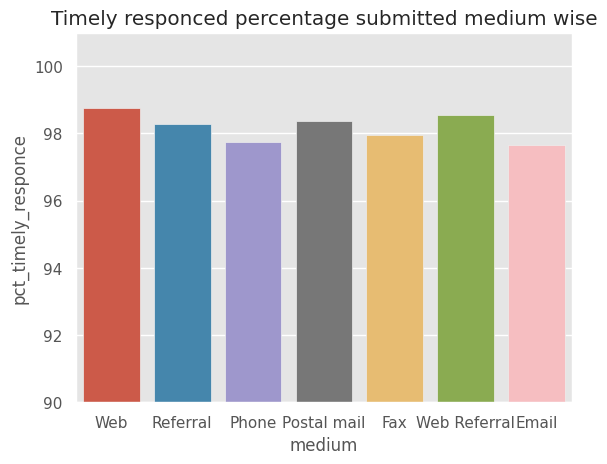

In [50]:
submited_medium = df['Submitted via'].value_counts().keys()
disputed_complains= df.groupby(by= df['Submitted via']).get_group('Web'
                                                                             )['Timely response?'].value_counts().values[0]
non_disputed_complains = df.groupby(by= df['Submitted via']
                                         ).get_group(submited_medium[0])['Timely response?'].value_counts().values[1]
total = disputed_complains + non_disputed_complains
pct_complain_disputed = disputed_complains*100/total
pct_complain_disputed
submited_medium = df['Submitted via'].value_counts().keys()
pct_complain_disputed = []
for i in range(len(submited_medium)):
    disputed_complains= df.groupby(by= df['Submitted via']).get_group(submited_medium[i])['Timely response?'].value_counts().values[0]
    non_disputed_complains = df.groupby(by= df['Submitted via']).get_group(submited_medium[i])['Timely response?'].value_counts().values[1]
    total = disputed_complains + non_disputed_complains
    pct = disputed_complains*100/total
    pct_complain_disputed.append(pct)


plot_data_frame = pd.DataFrame([np.array(submited_medium), np.array(pct_complain_disputed)]).T
plot_data_frame.rename(columns = {0:'medium'}, inplace = True)
plot_data_frame.rename(columns = {1:'pct_timely_responce'}, inplace = True)

plt.title("Timely responced percentage submitted medium wise")
sns.barplot(data=plot_data_frame, x='medium', y = 'pct_timely_responce')
plt.ylim(90,101)

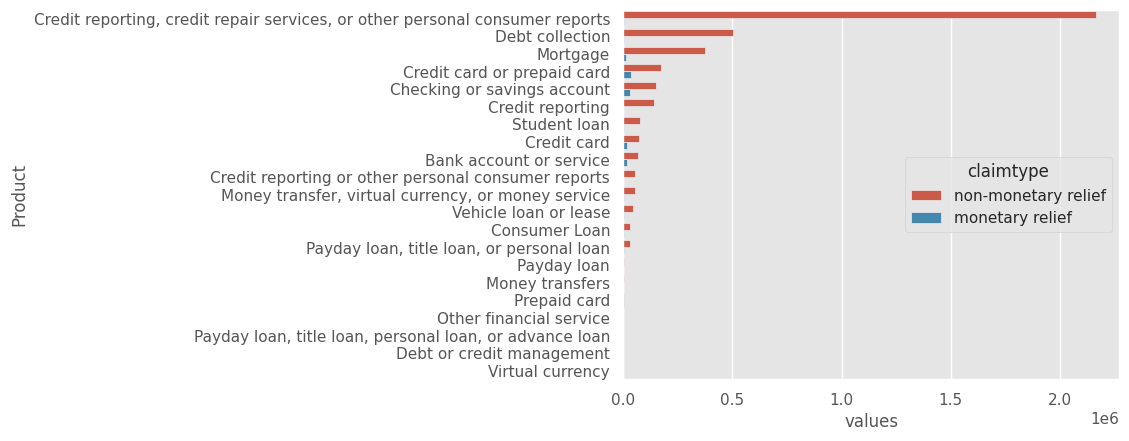

In [51]:
product_and_benifit = df[['Product','Company response to consumer']]
monetory_benifit=product_and_benifit[product_and_benifit['Company response to consumer'] == 'Closed with monetary relief']
product_and_benifit['Company response to consumer'] = np.where(
    product_and_benifit['Company response to consumer'] == 'Closed with monetary relief','monetary relief',
    'non-monetary relief')

values = product_and_benifit.value_counts().values
product = []
claim_type = []
for i in range(len(product_and_benifit.value_counts())):
    product.append(product_and_benifit.value_counts().keys()[i][0])
    claim_type.append(product_and_benifit.value_counts().keys()[i][1])

plot_df_moni = pd.DataFrame({'Product':product,'claimtype':claim_type,'values':values})

sns.barplot(data=plot_df_moni, x = 'values', y = 'Product', hue = 'claimtype')
plt.show()

In [52]:
color = [
    '#FA57BC',
    '#FCEA86',
    '#7D73D9',
    '#81D973',
    '#8CEDF0',
    '#D9BF98',
    '#ECEFB4',
    '#FCB3B1',
    '#82C0FA',
    '#98D9B0',
    '#F07E51',
    '#9E5DF0',
    '#BCEEE6'
]

In [53]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [54]:
df3=df.copy()
df3['Date received'] = pd.to_datetime(df['Date received'])
df3['Date sent to company'] = pd.to_datetime(df['Date sent to company'], errors='coerce')
print(df3['Date sent to company'].dtype)
df3['received Year'] = df3['Date received'].dt.year
df3['received Month'] = df3['Date received'].dt.strftime('%b')
df3['received Week'] = df3['Date received'].dt.strftime('%A')

df3['sent to company Year'] = df3['Date sent to company'].dt.year
df3['sent to company Month'] = df3['Date sent to company'].dt.strftime('%b')
df3['sent to company Week'] = df3['Date sent to company'].dt.strftime('%A')
# replacing null values with 'unknown'
df3.fillna('Unknown',inplace=True)

datetime64[ns]


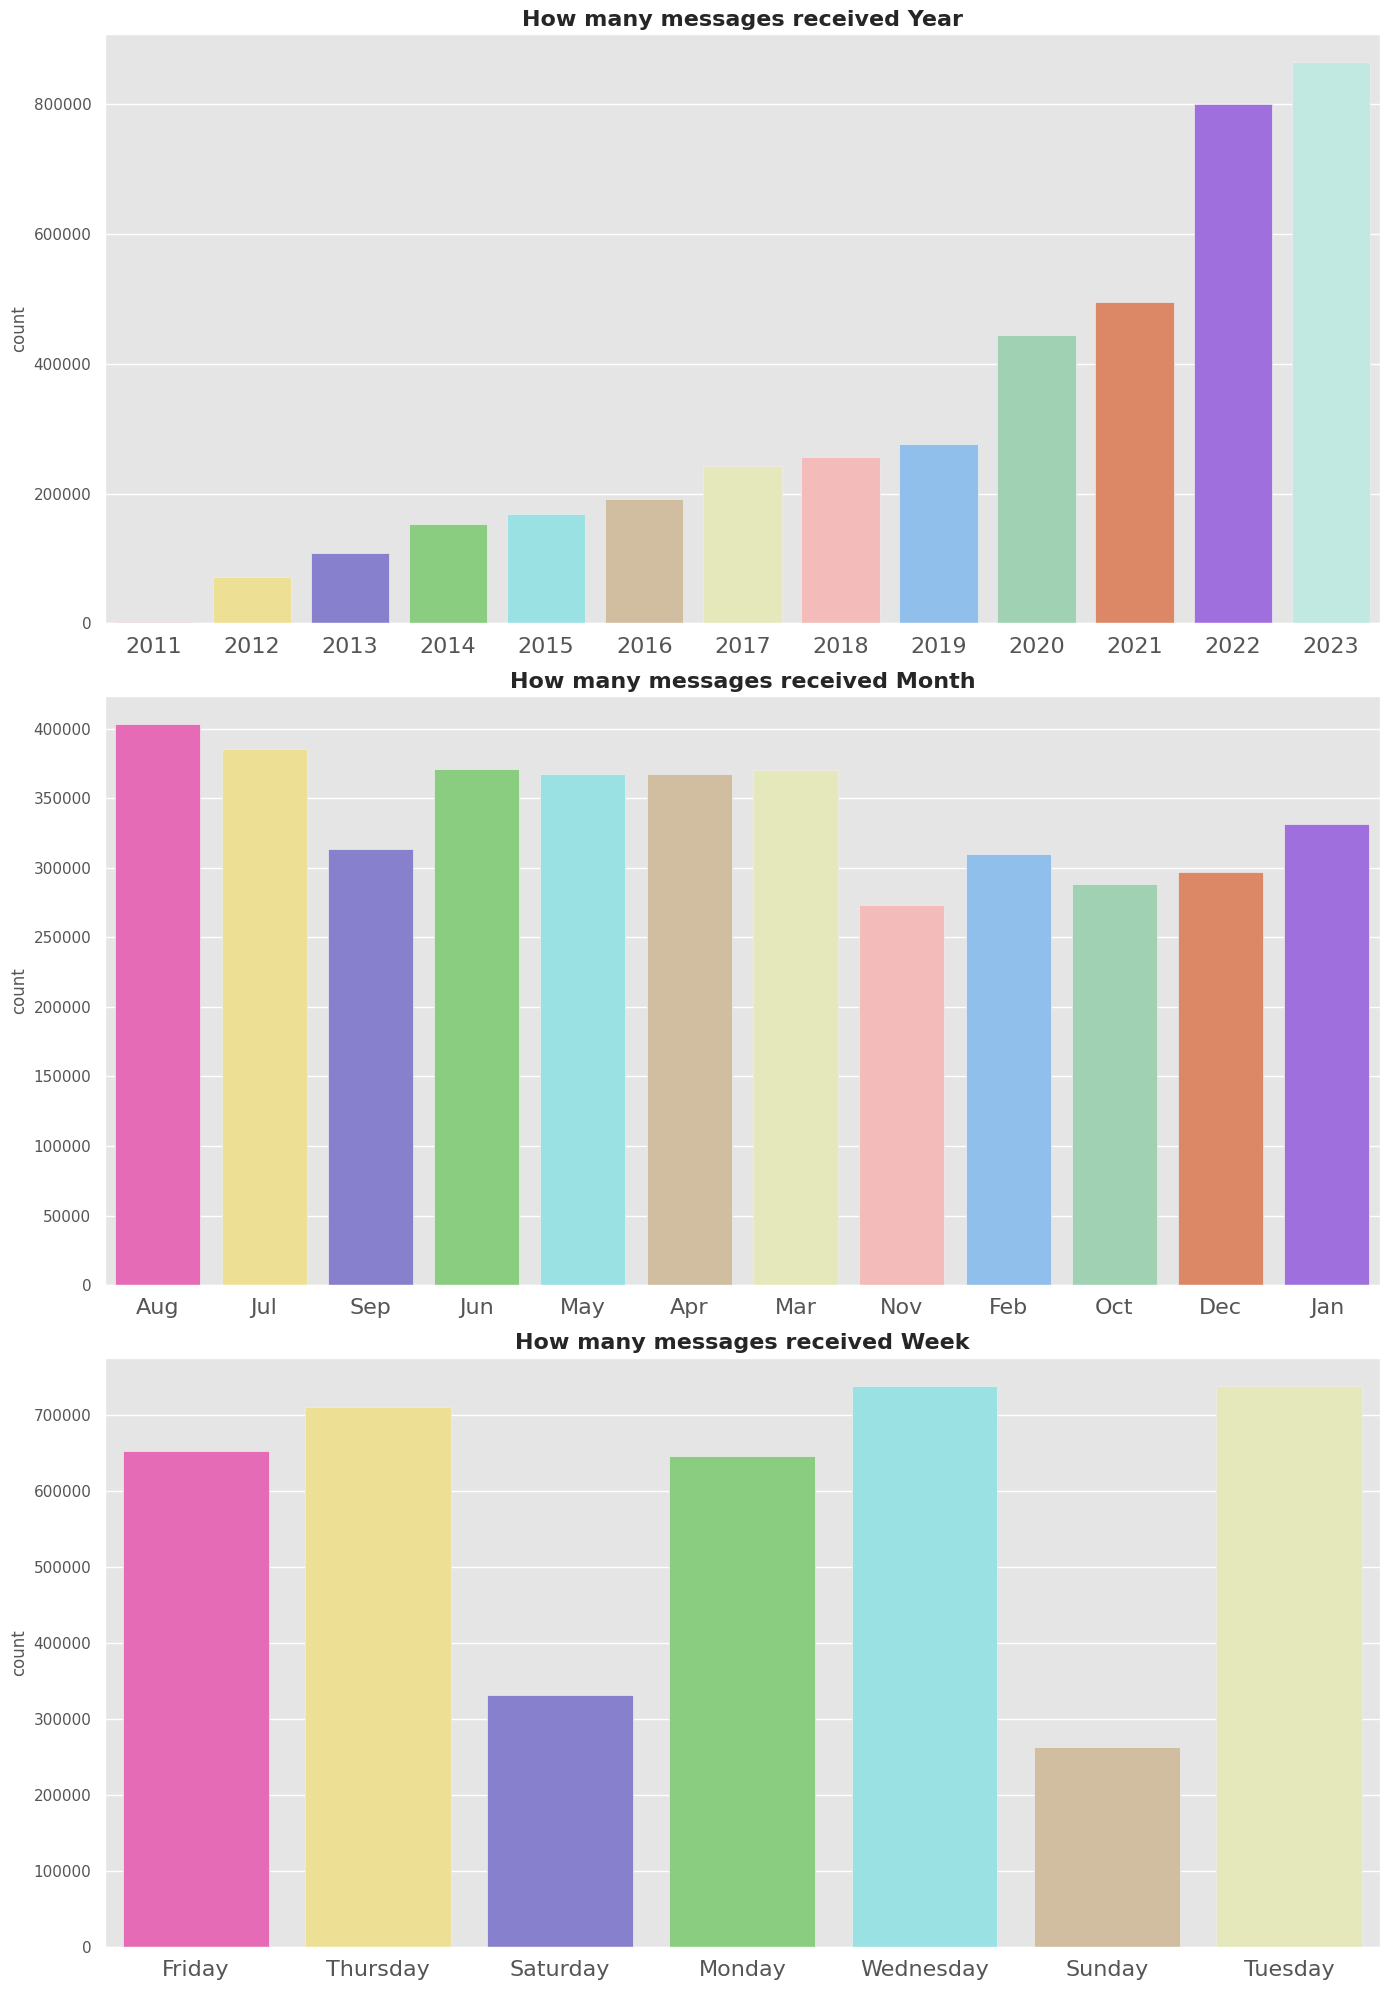

In [55]:
# How many messages sent per year?
'''
The year that received the most messages was 2016, as well as the months of Mar., Apr. and Jan.
The middle of the week like Thursday, Tuesday, wednesday are the days that receive messages.
'''

columns = ['received Year','received Month', 'received Week']

plt.figure(figsize=(14,20))
for i,col in enumerate(columns):
    ax = plt.subplot(3,1,i+1)
    sns.countplot(x=df3[col],palette=color)
    plt.title(f'How many messages {col}', fontweight='bold',fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlabel(None)
plt.tight_layout()
plt.show()

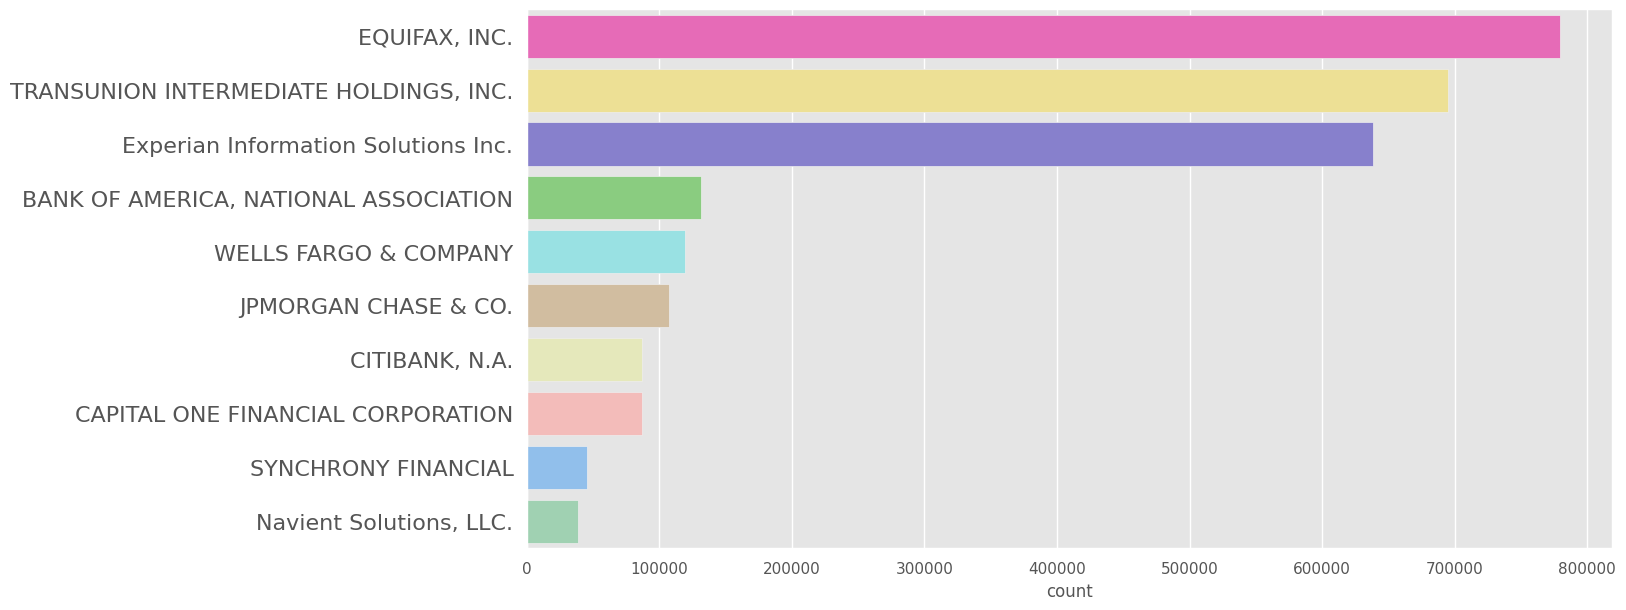

In [56]:
#Which companies receive the most complaints?
plt.figure(figsize=(14,7))
sns.countplot(y=df3['Company'], order=df3['Company'].value_counts().index[0:10],palette=color)
plt.yticks(fontsize=16)
plt.ylabel(None)
plt.show()

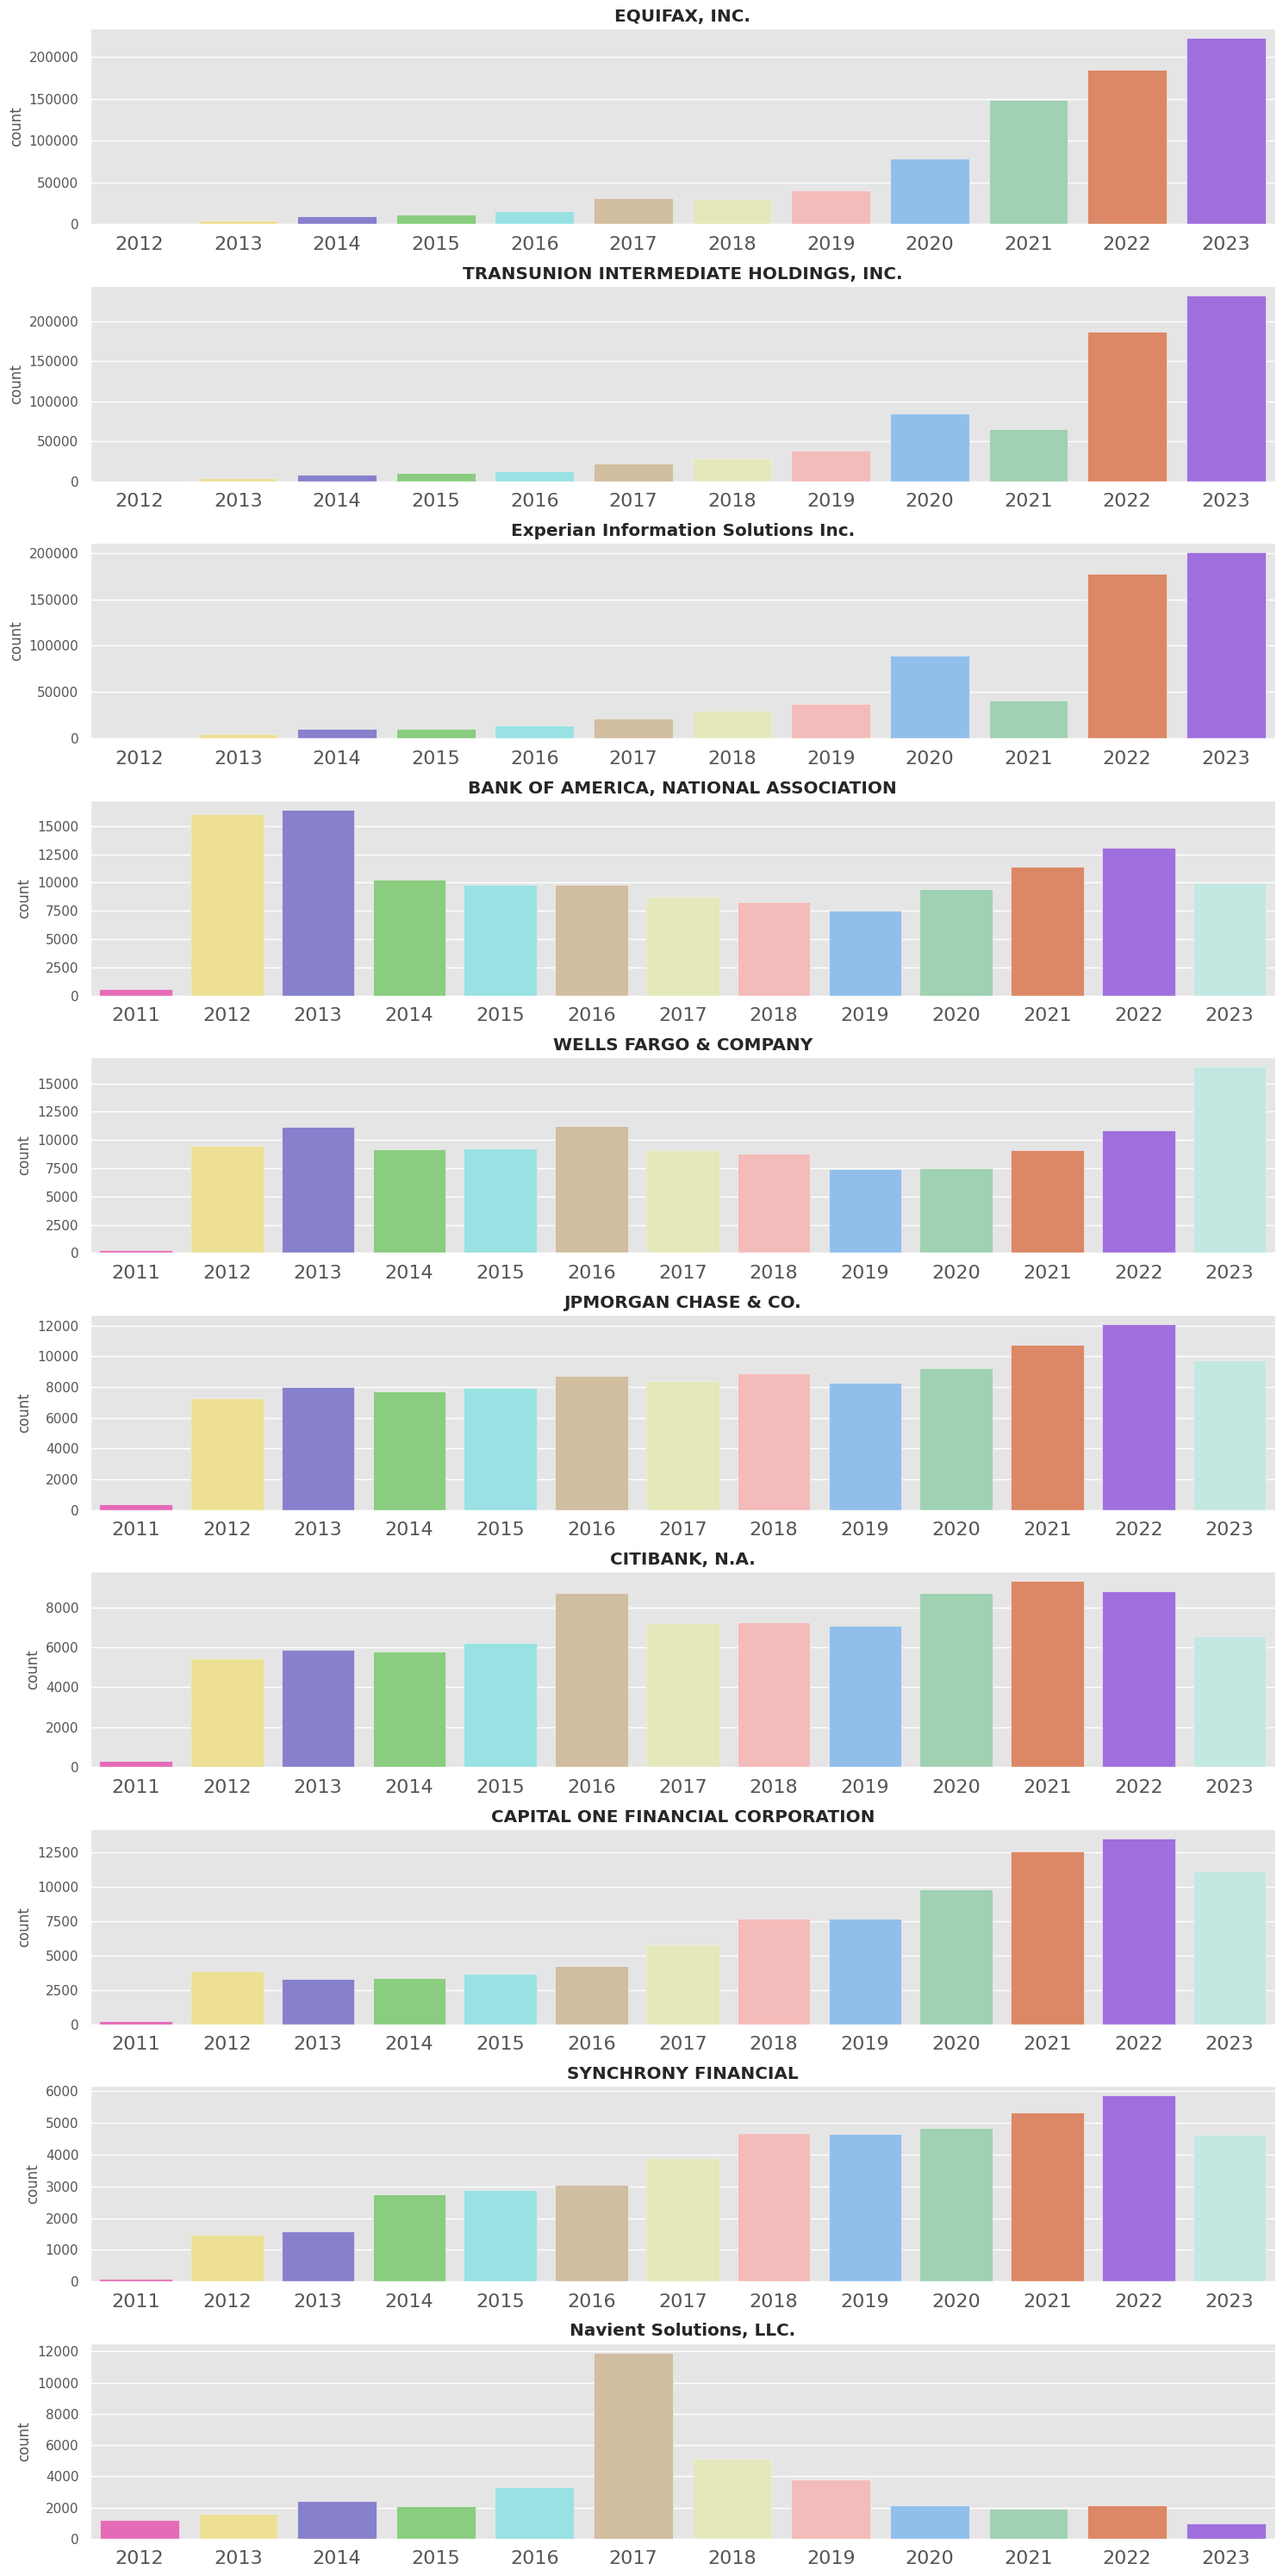

In [57]:
#Sending a message per year by the company with the most complaints?
'''
comparison of how many messages received per year by the 10 most frequent companies in the data
'''

colunas = df['Company'].value_counts().head(10)

plt.figure(figsize=(15,30))

for i, col in enumerate(colunas.index):
    ax = plt.subplot(10,1, i + 1)
    sns.countplot(x='received Year', data=df3[df3['Company'] == col],palette=color)
    plt.title(col,fontweight='bold')
    plt.xticks(fontsize=16)
    plt.xlabel(None)
plt.tight_layout()
plt.show()

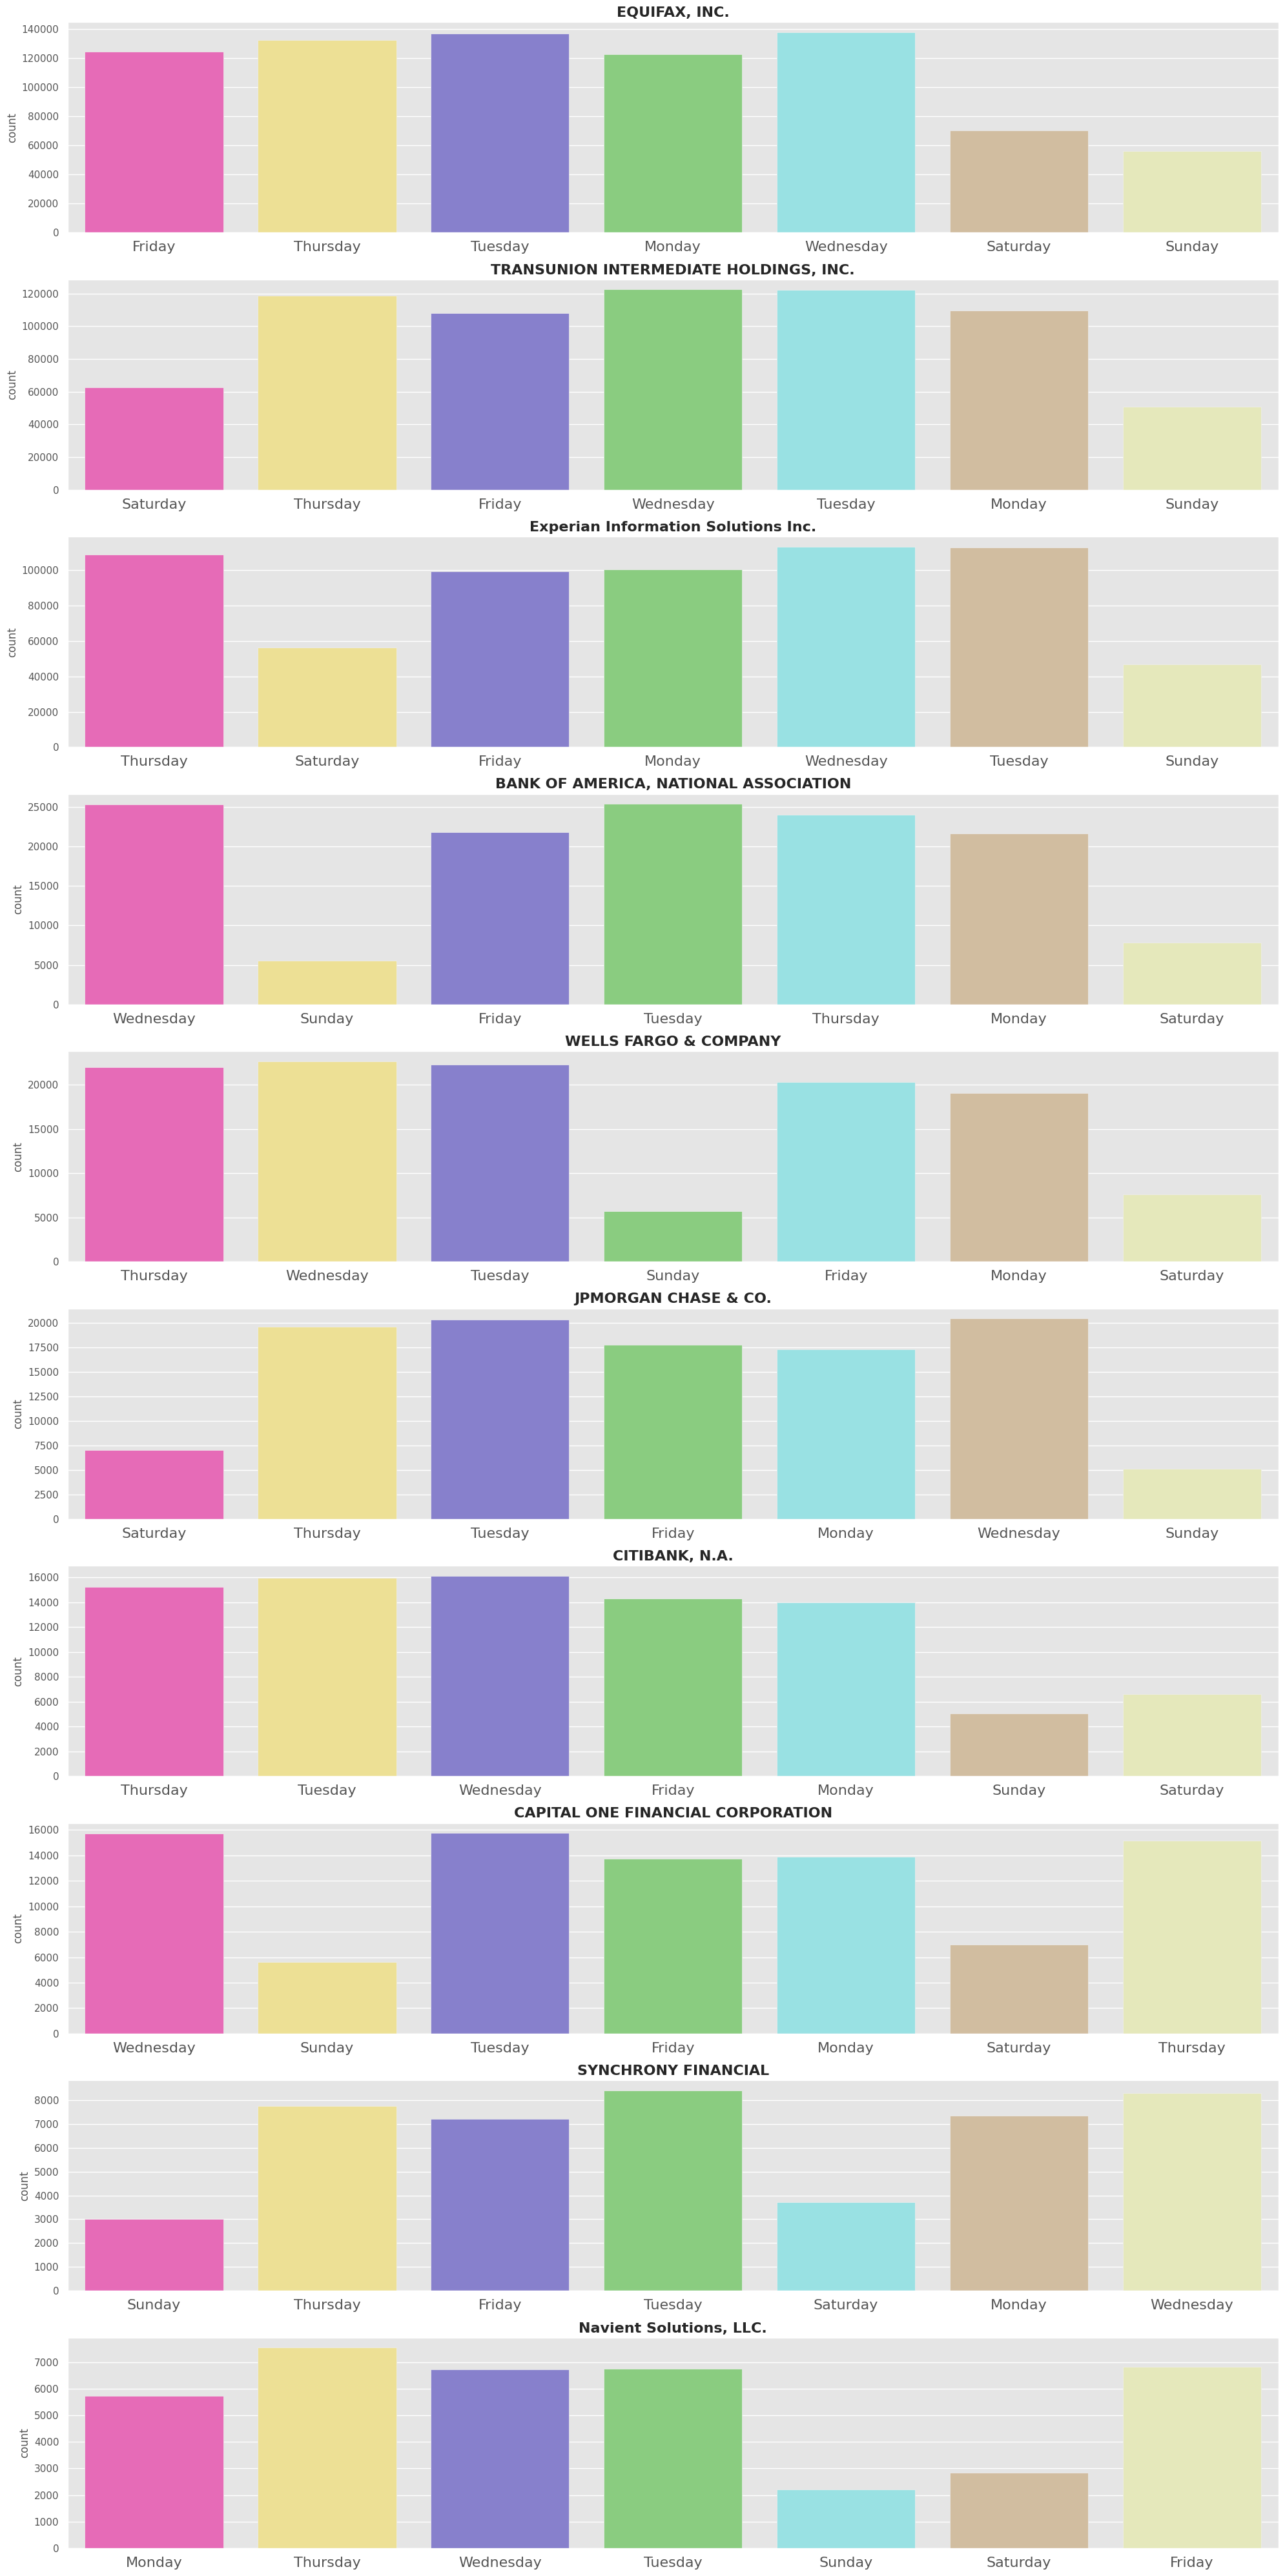

In [58]:
#Receipt of message in the week by company with more complaints?
'''
comparison of how many messages received per week by the 10 most frequent companies in the data
Here we see how often a company receives messages in the week. Wednesday, Tuesday and Thursday are the most popular weeks
'''
colunas = df3['Company'].value_counts().head(10)

plt.figure(figsize=(20,40))

for i, col in enumerate(colunas.index):
    ax = plt.subplot(10,1, i + 1)
    sns.countplot(x='received Week', data=df3[df3['Company'] == col],palette=color)
    plt.title(col,fontweight='bold',fontsize=16)
    plt.xticks(fontsize=16)
    plt.xlabel(None)
plt.tight_layout()
plt.show()

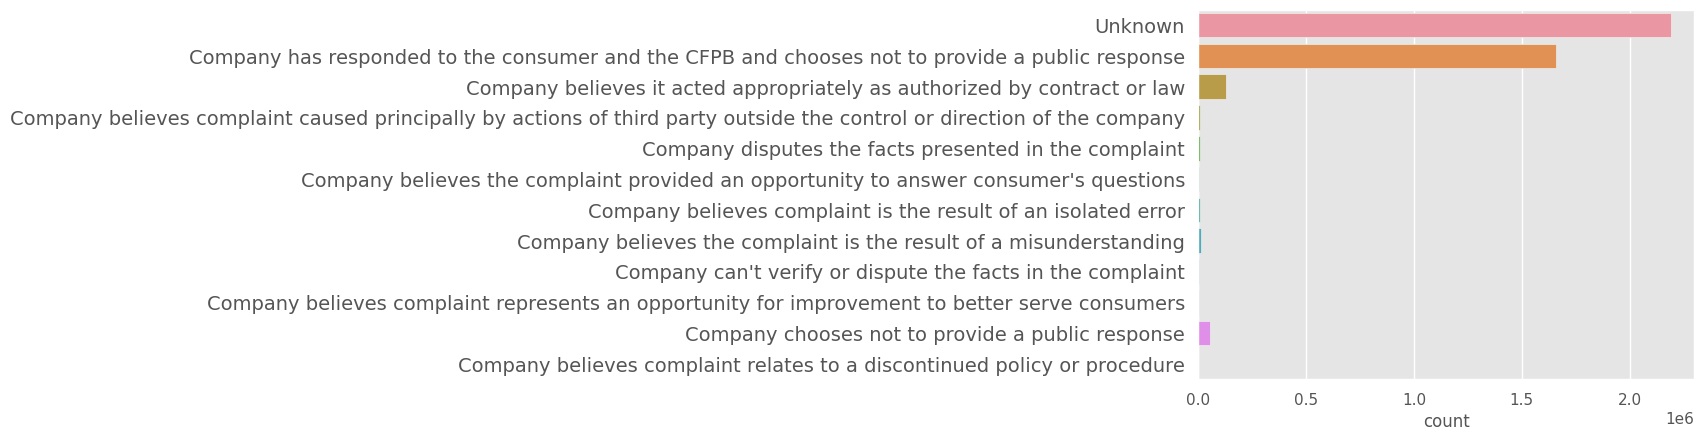

In [59]:
#What are the most common answers for consumers?
sns.countplot(y=df3['Company public response'])
plt.yticks(fontsize=14)
plt.ylabel(None)
plt.show()

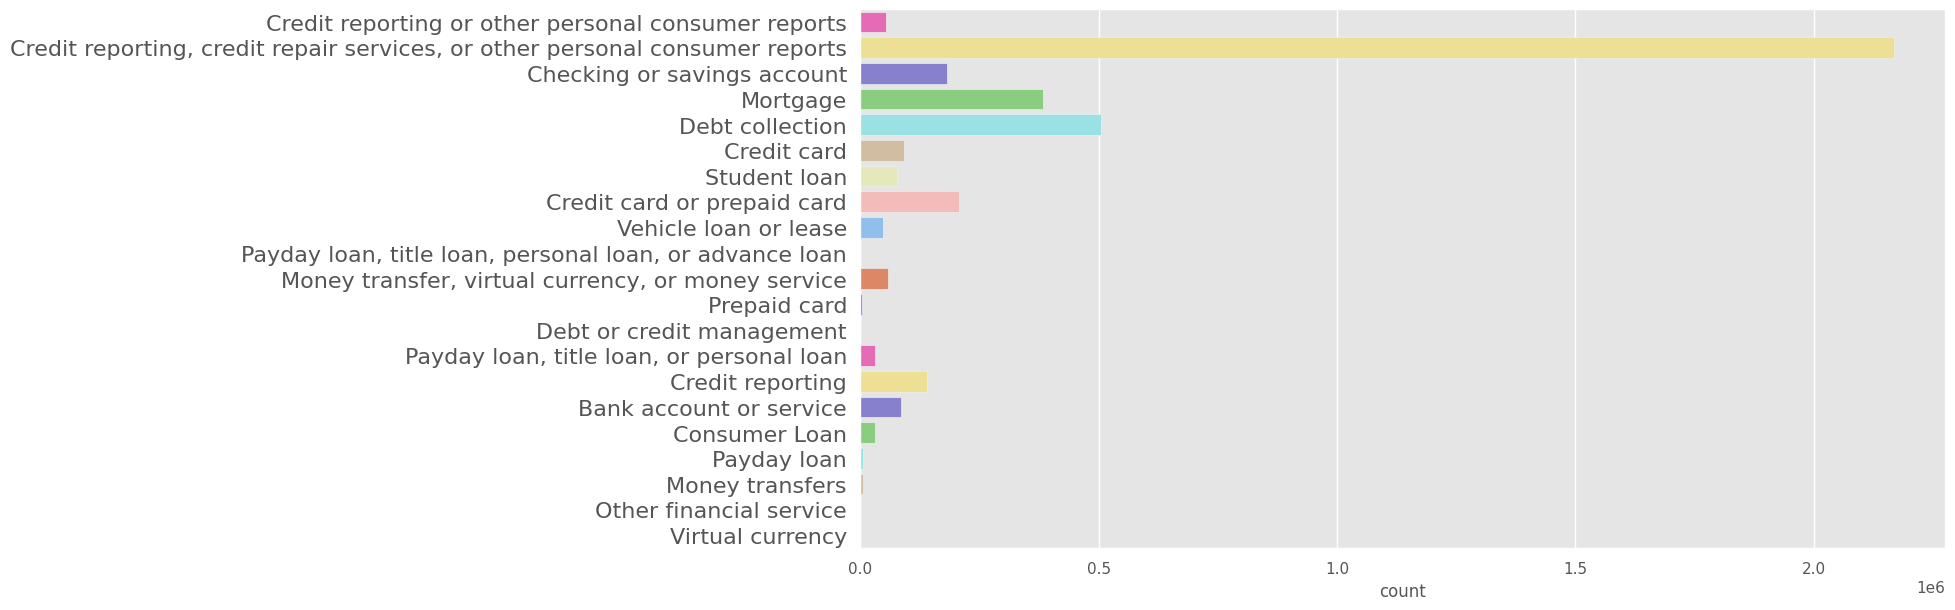

In [60]:
#What are the products with the most complaints?
plt.figure(figsize=(14,7))
sns.countplot(y=df3['Product'],palette=color)
plt.yticks(fontsize=16)
plt.ylabel(None)
plt.show()

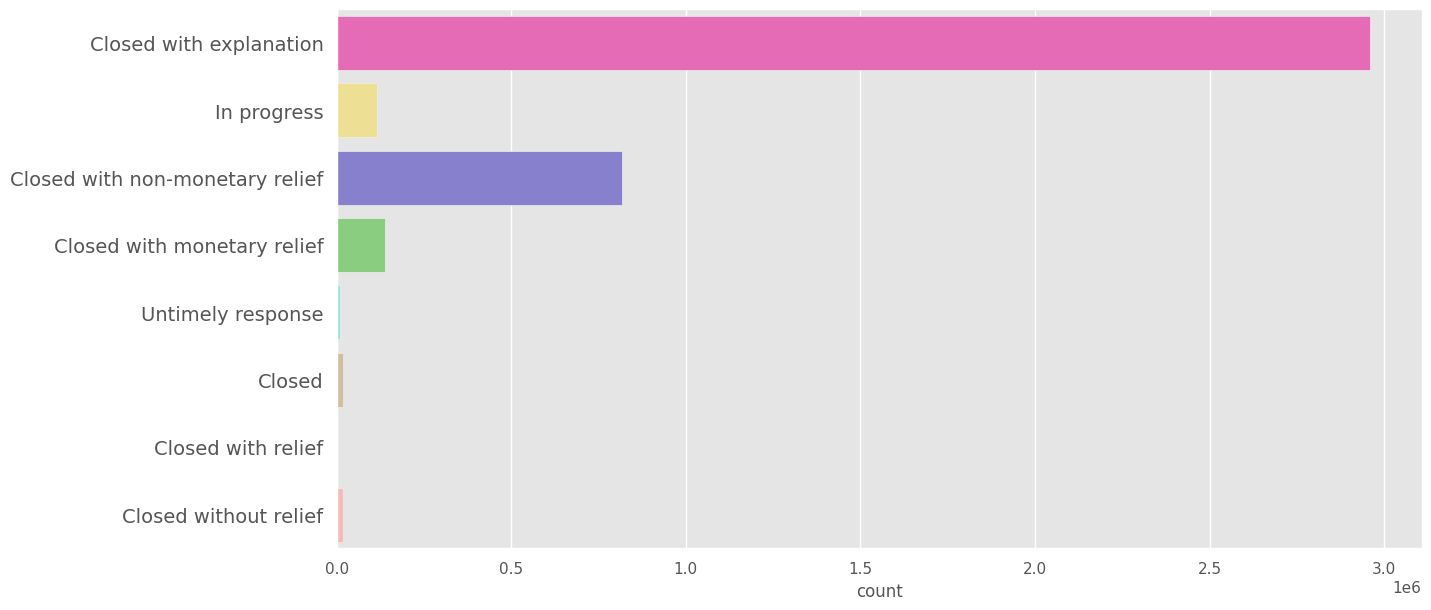

In [61]:
#What are the by-products with the most complaints?
df['Sub-product'].unique().tolist()

df['Sub-product'].value_counts().head(10)

#What are the company's responses to the consumer??
plt.figure(figsize=(14,7))
sns.countplot(y=df['Company response to consumer'],palette=color)
plt.yticks(fontsize=14)
plt.ylabel(None)
plt.show()

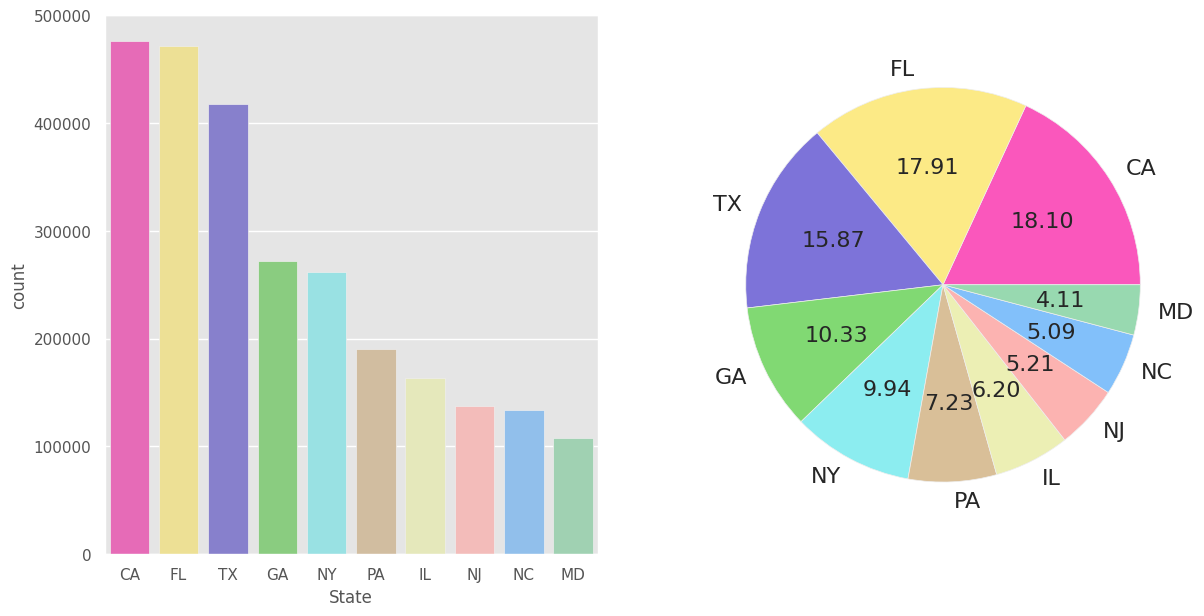

In [62]:
#What is the state with the most consumer complaints?
fig, ax = plt.subplots(1,2, figsize=(14,7))

sns.countplot(x=df['State'], order=df['State'].value_counts().index[0:10], ax=ax[0],palette=color)
df['State'].value_counts().head(10).plot.pie(autopct='%.2f',colors=color,textprops={'size':16})
plt.axis('off')
plt.show()

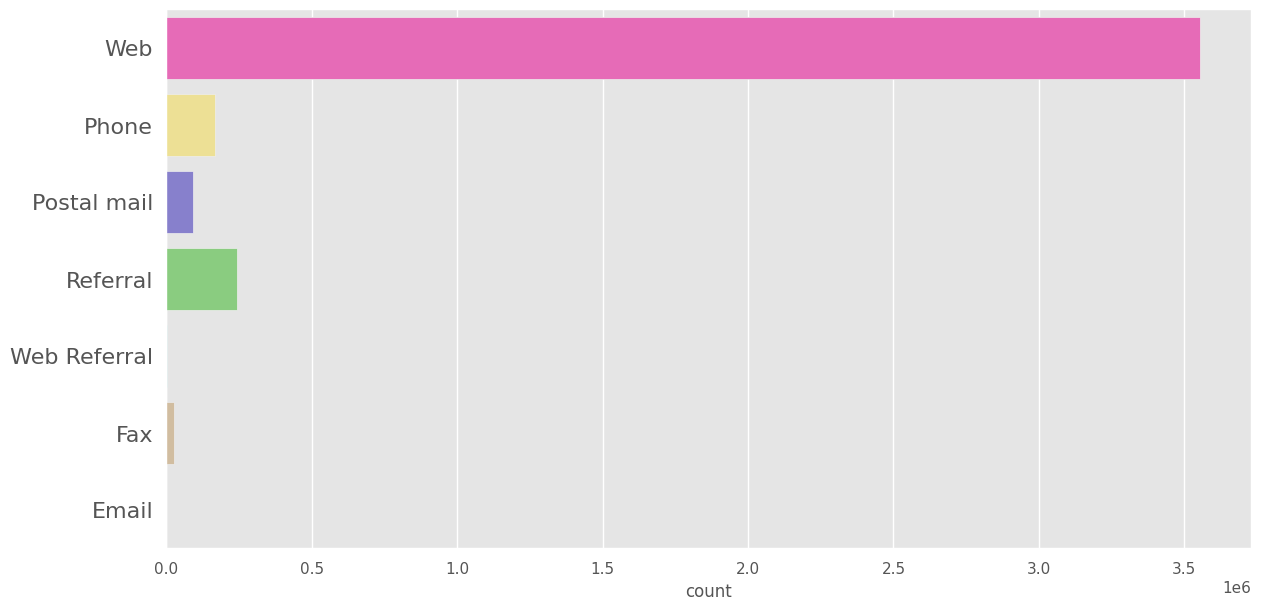

In [63]:
#What is the shipping method?
plt.figure(figsize=(14,7))
sns.countplot(y=df['Submitted via'],palette=color)
plt.yticks(fontsize=16)
plt.ylabel(None)
plt.show()

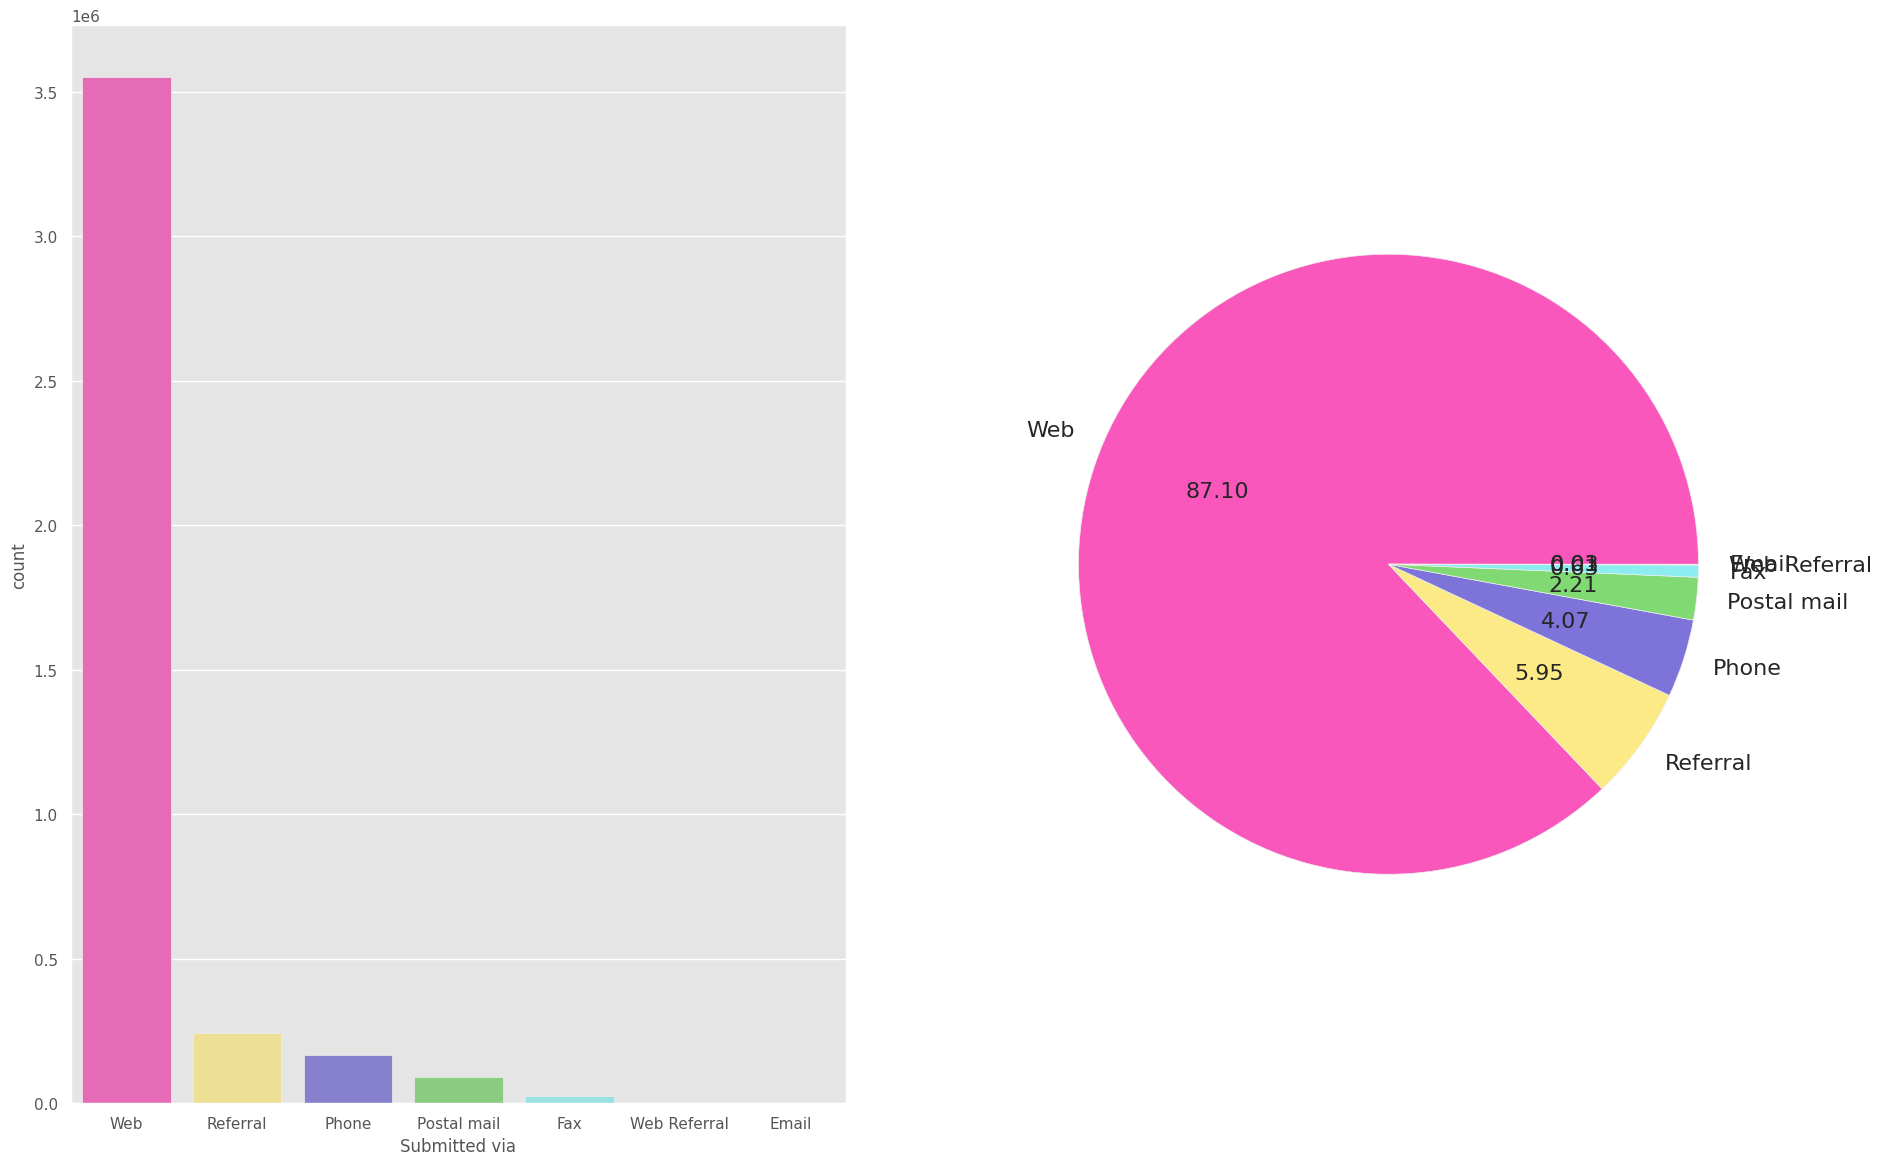

In [64]:
#quantity and percentage of sending messages via
fig, ax = plt.subplots(1,2, figsize=(22,14))

sns.countplot(x=df['Submitted via'], order=df['Submitted via'].value_counts().index[0:10], ax=ax[0],palette=color)
df['Submitted via'].value_counts().head(10).plot.pie(autopct='%.2f',colors=color,textprops={'size':16})
plt.axis('off')
plt.show()

In [65]:
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values,
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types',autosize=False,
    width=1000,
    height=1000)

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Credit reporting, credit repair services, or other personal consumer reports    53.13
Debt collection                                                                 12.40
Mortgage                                                                         9.41
Credit card or prepaid card                                                      5.06
Checking or savings account                                                      4.47
Credit reporting                                                                 3.44
Credit card                                                                      2.24
Bank account or service                                                          2.11
Student loan                                                                     1.88
Money transfer, virtual currency, or money service                               1.44
Credit reporting or other personal consumer reports                              1.33
Vehicle loan or lease                                 

In [67]:
# Building the variables for our graphs
import plotly.tools as tls
disputed = df['Consumer disputed?'].value_counts()
company_response = df['Company response to consumer'].value_counts()
top5_disputed = df['Company'].loc[df['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['Company'].loc[df['Consumer disputed?'] == 'No'].value_counts()[:5]
# Top three subplots
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )

top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Blues')
    )

# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=df['Company response to consumer'].value_counts().values,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'],
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'],
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'],
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)

fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer Disputed?',
                                          'Disputes',
                                         'No Disputes',
                                         'Customer Response'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=1000, width=1000, title='Sectors')
iplot(fig, filename='Complaints')

In [68]:
df['Company'].str.strip("'").value_counts()[0:15].iplot(kind='bar',
                                                          title='Top 15 Company',fontsize=14,color='crimson')

In [69]:
from datetime import datetime
df['Date'] =pd.to_datetime(df['Date received'])

#Extracting Year.
df['Year'] =df['Date'].dt.year

#Extracting Month.
df['Month'] =df['Date'].dt.month_name()

#Extracting Weekdays

df['Week_Days'] = df['Date'].dt.day_name()
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Week_Days
0,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,15146,...,Web,2023-08-26,Closed with explanation,Yes,NaN,7560850,2023-08-25,2023,August,Friday
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30152,...,Web,2023-08-25,Closed with explanation,Yes,NaN,7560851,2023-08-25,2023,August,Friday
2,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",FL,32137,...,Web,2023-08-25,Closed with explanation,Yes,NaN,7560852,2023-08-25,2023,August,Friday
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",PA,15146,...,Web,2023-08-25,Closed with explanation,Yes,NaN,7560853,2023-08-25,2023,August,Friday
4,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NV,89135,...,Web,2023-08-25,Closed with explanation,Yes,NaN,7560854,2023-08-25,2023,August,Friday


In [70]:
df['Week_Days'].value_counts().iplot(kind ='barh',title ='Number of Complaints per Weekday')

In [71]:
pd.crosstab(df['Year'],df['Month']).iplot(kind='bar',barmode='stack',
                                                        title='Number of Complaints per Month')

In [72]:
grouped = df.groupby(['Company response to consumer']).size()
pie_chart = go.Pie(labels=grouped.index,values=grouped,
                  title='Company Response to the Customer')
iplot([pie_chart])

In [73]:
states = df['State'].value_counts()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = states.index,
    z = states.values,
    locationmode = 'USA-states',
    text = states.index,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(254,254,254)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Complaints")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Complaints by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(100,149,237)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [74]:
pd.crosstab(df['Timely response?'],df['Submitted via']).iplot(kind='bar',
                                                                                    title='Company Response to the Customer')

In [75]:
pd.crosstab(df['Timely response?'], df['Consumer disputed?']).iplot(kind='bar',
                                                                    title ='Timely Response vs Consumer Disputed' )

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder =OneHotEncoder()

In [77]:
# Label Encoding the Consumer Disputed? column
df['Consumer_encode']= labelencoder.fit_transform(df['Consumer disputed?'])
enc = OneHotEncoder(handle_unknown='ignore')
consumer_data1 = pd.DataFrame(enc.fit_transform(df[['Product']]).toarray())
df = df.join(consumer_data1)

In [78]:
x = df.iloc[:,24:41].values
y = df['Consumer_encode'].values

In [79]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size =0.25, random_state =10)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [81]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state =10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [82]:
y_pred = classifier.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[125216      0  29949]
 [ 30709      0   6389]
 [ 62586      0 764868]]


In [84]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.872873552171828


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=10),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Loop through classifiers, train, and evaluate
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Evaluate the model using classification report and accuracy
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the classification report and accuracy
    print(f'Classifier: {classifier_name}')
    print(f'Classification Report:\n{report}')
    print(f'Accuracy: {accuracy}\n')

Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67    155165
           1       0.00      0.00      0.00     37098
           2       0.95      0.92      0.94    827454

    accuracy                           0.87   1019717
   macro avg       0.51      0.58      0.54   1019717
weighted avg       0.86      0.87      0.86   1019717

Accuracy: 0.872873552171828

Classifier: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67    155165
           1       0.00      0.00      0.00     37098
           2       0.95      0.92      0.94    827454

    accuracy                           0.87   1019717
   macro avg       0.51      0.58      0.54   1019717
weighted avg       0.86      0.87      0.86   1019717

Accuracy: 0.872873552171828

